<a href="https://colab.research.google.com/github/Murcha1990/ML_AI25/blob/main/Hometasks/Pro/AI_HW1_Regression_with_inference_pro_pt1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Домашнее задание №1 (pro). Часть 1**

В этом домашнем задании (его первой части) вам будет необходимо:
*  обучить модель регрессии для предсказания стоимости автомобилей;


> Оценка за первую часть домашки = $min(\text{ваш балл}, 7)$



**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Вопросы подсвечены синим цветом.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

### **Задание 0**
Давайте зафиксируем важный момент.

**Задание 0 (0 баллов).**
Изучите и ответье на вопрос: для чего фиксируем сиды в домашках?

`Ответ`

Сиды фиксируем для воспроизводимости результатов.

Как мы знаем настоящей случайности в наших компьютерах - нет. Есть псевдослучайность, которая определяется алгоритмом, которому нужно задать отправную точку - `seed`. Каждый отдельный `seed` всегда будет выдавать одну и ту же последовательность чисел, благодаря чему мы будем получать все время одни и те же псевдослучайные результаты, что и поможет нам с воспроизводимостью домашек на разных устройствах.

Источники:
* Воспоминания из головы
* [Статья на Хабр для более точного описания](https://habr.com/ru/articles/952192/#:~:text=%D0%93%D0%BB%D0%B0%D0%B2%D0%BD%D0%BE%D0%B5%2C%20%D1%87%D1%82%D0%BE%20%D0%BD%D1%83%D0%B6%D0%BD%D0%BE,%D0%B8%20%D0%B2%D0%BE%D1%81%D0%BF%D1%80%D0%BE%D0%B8%D0%B7%D0%B2%D0%BE%D0%B4%D0%B8%D0%BC%D0%BE%D1%81%D1%82%D0%B8%20%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2.)



# **Часть 1 | EDA**


Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков (1.7 балла)
- Визуализации признаков и их анализ (1.6 балл)

Всего можно набрать 3.3 основных балла и 0.25 бонусных.

В следующих частях, вы увидите бонусные задания. Бонусные задания выделены как **Дополнительное задание/Бонус**. Вы можете выполнять их, чтобы в случае ошибок в основных задачах всё равно набрать за работу максимум. Кроме того, дополнительные задания позволяют вам углубить знания.

Призываем активно использовать их!

## **Простейший EDA и обработка признаков (1.7 балла)**

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


### **Задание 1.(0.4 балла)**
Выполните операции, направленные на базовое исследование данных:

- [x] Посмотрите, есть ли в датасете пропуски и дубликаты. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [x] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)
- [x] Постройте дашборд в одну строку, используя [ydata-profilling](https://github.com/ydataai/ydata-profiling)(0.15 балла)
- [x] Опишите базовые выводы (какие — выберите сами), используя дашборд (0.2 балла).

In [3]:
for i in range(0, len(df_train)):
  try:
    ffil_value = float(df_train.loc[i, 'max_power'][:-4])
    df_train.loc[i, 'max_power'] = ffil_value

  except:
    if df_train.loc[i, 'max_power'] in [np.nan, 'nan']:
      continue
    elif df_train.loc[i, 'max_power'] == '0':
      ffil_value = float(df_train.loc[i, 'max_power'])
      df_train.loc[i, 'max_power'] = ffil_value
    else:
      df_train.loc[i, 'max_power'] = 0

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6999 entries, 0 to 6998
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6999 non-null   object 
 1   year           6999 non-null   int64  
 2   selling_price  6999 non-null   int64  
 3   km_driven      6999 non-null   int64  
 4   fuel           6999 non-null   object 
 5   seller_type    6999 non-null   object 
 6   transmission   6999 non-null   object 
 7   owner          6999 non-null   object 
 8   mileage        6797 non-null   object 
 9   engine         6797 non-null   object 
 10  max_power      6803 non-null   object 
 11  torque         6796 non-null   object 
 12  seats          6797 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 711.0+ KB


In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           1000 non-null   object 
 1   year           1000 non-null   int64  
 2   selling_price  1000 non-null   int64  
 3   km_driven      1000 non-null   int64  
 4   fuel           1000 non-null   object 
 5   seller_type    1000 non-null   object 
 6   transmission   1000 non-null   object 
 7   owner          1000 non-null   object 
 8   mileage        981 non-null    object 
 9   engine         981 non-null    object 
 10  max_power      981 non-null    object 
 11  torque         981 non-null    object 
 12  seats          981 non-null    float64
dtypes: float64(1), int64(3), object(9)
memory usage: 101.7+ KB


# Анализ пропусков


In [6]:
df_train.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.0,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86,113.75nm@ 4000rpm,5.0


In [7]:
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


## Комментарий

Из вывода метода `info()` видно, что столбцы `mileage`, `engine`, `max_power`, `torque` и `seats` имеют пропуски, но pandas при подсчете пустых значений учитывает только `np.nan`, `pd.NA` и `None` (ист. Qwen, был вопрос про работу `info()` "под капотом"). Из-за этого мы можем пропустить значения, которые были записаны как, например, `unknown`.

Логических подвохов не наблюдаю: нейминг столбцов совпадает с их типом. Могло бы быть такое, что по названию ожидаешь численный тип, а там оказывается `object` - признак того, что туда закралось что-то не то, но метод `head()` показал, что типы совпадают с фактическими данными. Вызывают вопросы, конечно, `mileage`, `engine`, `max_power`, `torque` - скорее всего тут нужно будет убрать единицы измерения, но пока, с точки зрения типов и фактических данных, все хорошо.

Давайте дальше поисследуем датафрейм на предмет пропусков, обозначенных иначе



In [8]:
def unique_vals_count(dataframe):
    for col in dataframe.columns:
        unique_vals = dataframe[col].unique()
        print(col, len(unique_vals))

In [9]:
unique_vals_count(df_train)

name 1924
year 29
selling_price 637
km_driven 827
fuel 4
seller_type 3
transmission 2
owner 5
mileage 387
engine 121
max_power 314
torque 420
seats 10


In [10]:
unique_vals_count(df_test)

name 621
year 24
selling_price 274
km_driven 260
fuel 4
seller_type 3
transmission 2
owner 5
mileage 238
engine 89
max_power 183
torque 227
seats 7


## Комментарий

Давайте в начале посмотрим на те столбцы, у которых не так много уникальных значений, а именно на `year`, `fuel`, `seller_type`, `transmission`, `owner` и `seats`

In [11]:
def inspect_cols_unique_values(dataframe):
    for col in ['year', 'fuel', 'seller_type', 'transmission', 'owner', 'seats']:
        val_counts = dataframe[col].value_counts(dropna=False)
        print(val_counts, '\n')

In [12]:
inspect_cols_unique_values(df_train)

year
2017    870
2016    736
2018    704
2015    662
2013    581
2012    563
2014    532
2019    511
2011    499
2010    336
2009    208
2008    191
2007    164
2006    103
2005     86
2020     69
2004     51
2003     40
2002     23
2000     21
1999     13
1997     10
1998      9
2001      8
1996      3
1994      3
1983      1
1995      1
1991      1
Name: count, dtype: int64 

fuel
Diesel    3793
Petrol    3120
CNG         52
LPG         34
Name: count, dtype: int64 

seller_type
Individual          5826
Dealer               967
Trustmark Dealer     206
Name: count, dtype: int64 

transmission
Manual       6095
Automatic     904
Name: count, dtype: int64 

owner
First Owner             4587
Second Owner            1791
Third Owner              473
Fourth & Above Owner     144
Test Drive Car             4
Name: count, dtype: int64 

seats
5.0     5393
7.0      944
8.0      208
NaN      202
4.0      104
9.0       72
6.0       54
10.0      19
2.0        2
14.0       1
Name: count, dtype:

In [13]:
inspect_cols_unique_values(df_test)

year
2017    134
2016    106
2015     96
2018     91
2011     85
2012     83
2014     79
2013     76
2019     64
2010     49
2009     34
2008     21
2006     20
2007     16
2004     10
2005     10
2003      8
1999      5
2002      4
2020      4
2001      2
1995      1
2000      1
1998      1
Name: count, dtype: int64 

fuel
Diesel    534
Petrol    457
CNG         5
LPG         4
Name: count, dtype: int64 

seller_type
Individual          837
Dealer              135
Trustmark Dealer     28
Name: count, dtype: int64 

transmission
Manual       877
Automatic    123
Name: count, dtype: int64 

owner
First Owner             623
Second Owner            278
Third Owner              71
Fourth & Above Owner     27
Test Drive Car            1
Name: count, dtype: int64 

seats
5.0    758
7.0    161
4.0     24
8.0     23
NaN     19
6.0      8
9.0      7
Name: count, dtype: int64 



## Комментарий

В данных столбцах не оказалось каких-то специфичных значений, которые могли бы обозначать пропуски. Теперь посмотрим остальные

In [14]:
numeric_data = ['selling_price', 'km_driven']

categorical_data = ['name', 'mileage', 'engine', 'max_power', 'torque']

In [15]:
def inspect_min_vals(dataframe):
    for col_name in numeric_data:
        print(col_name, dataframe[col_name].min())

In [16]:
inspect_min_vals(df_train)

selling_price 29999
km_driven 1


In [17]:
inspect_min_vals(df_test)

selling_price 31000
km_driven 1303


## Комментарий

Так как столбцы `selling_price`, `km_driven` имеют численные типы, я ограничился лишь одним методом `min()`, чтобы посмотреть нет ли каких-нибудь отрицательных значений. Это, конечно, скорее относится к ошибкам/выбросам, но вдруг пропущенные значения могли обозначать через них (-999, например).

Поэтому на текущий момент считаем, что в данных столбцах нет пропущенных значений.

Оставшиеся столбцы отсматривать глазами будет проблематично и очень ненадежно, так как значений там много и их легко можно будет пропустить, поэтому тут заведем список `nan_variations`, в котором будут храниться предсказуемые заглушки под пропуски, и проверим их наличие в наших данных, чтобы не затягивать с данным пунктом. Если мы и пропустим какие-то плохие значения, то, возможно, в следующих шагах мы сможем это обнаружить

In [18]:
nan_variations = ['unknown', 'na', 'n/a', '', '-', 'miss', 'nan', 'none']

def check_misses(dataframe):
    for col_name in categorical_data:
        try:
            if any(dataframe[col_name].str.lower().isin(nan_variations)):
                print(col_name)
        except AttributeError as exc:
            print(exc)
            continue

In [19]:
check_misses(df_train)

Can only use .str accessor with string values!


In [20]:
check_misses(df_test)

## Комментарий

Вывод оказался пустым, поэтому, пока что, делаем вывод, что пропуски имеют только столбцы `mileage`, `engine`, `max_power`, `torque` и `seats`, что изначально нам и показал метод `info()`

# Поиск дубликатов


In [21]:
def duplicated_data(dataframe, unique=False):
    masked_data = dataframe[dataframe.duplicated(keep=False)]
    if unique:
        return masked_data.drop_duplicates()
    return masked_data

In [22]:
duplicated_data(df_train, unique=True).shape[0]

493

In [23]:
duplicated_data(df_test, unique=True).shape[0]

33

In [24]:
duplicated_data(df_train).shape[0]

1478

In [25]:
duplicated_data(df_test).shape[0]

95

## Комментарий

`duplicated(keep=False)` помечает все дубликаты как `True` (ист. [оф. документация](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html#:~:text=False%20%3A%20Mark%20all%20duplicates%20as%20True.)), а далее мы применяем маску ко всем данным и делаем дроп дублей, чтобы посмотреть, сколько именно уникальных дублей.

Таким образом у нас:

* В `Train` данных 493 уникальных дублей и 1478 всего
* В `Test` данных 33 уникальных дублей и 95 всего

# Дашборд

## Комментарий

Сохраню отчет в `.html` формате, чтобы было удобнее смотреть 

In [26]:
from ydata_profiling import ProfileReport


ProfileReport(df_train, title="Train Report").to_file("train_report.html")
ProfileReport(df_test, title="Test Report").to_file("test_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 2243.77it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 1170.76it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Выводы по дашборду

Первое, что я сделал, это посмотрел в `allerts` и увидел, что кол-во пропусков для столбцов и кол-во дублей совпадает с тем, что я делал собственноручно для трейна и теста.

Далее для трейна и теста и посмотрел подробную статистику про каждый признак. Поискал какие-нибудь интересные значения. Конкретно обратил внимание на минимальную длину текстовых признаков - учитывая контекст было бы странно увидеть какие-нибудь значения по типу 0 или 1 - могло бы сигнализировать о пропущенных значениях, например.

По гистограммам видно, что числовые признаки смещены влево или вправо, а у признаков `selling_price` и `km_driven` наблюдаются экстремальные значения, которые находятся в хвостах. Такие закономерности, по идее, моделе будет уловить сложнее, так как эти экстремальные значения довольно редки

По счетчикам значений категориальных признаков видно, что присутствует дисбаланс - некоторых категорий очень мало

Пропусков в данных очень мало: на трейне это `1.1%`, а на тесте `0.7%`. Строки с пропусками, возможно, даже можно будет удалить, так как они **не превышают** `2%` для каждой выборки

Предстоит интересная работа с категориальными и текстовыми признакми - их у нас 9 из 13.

По хитмапе корреляций видно, что больше всего с целевым признаком `selling_price` коррелирует `km_driven`, что вполне логично. Еще хорошо выделяется корреляция `selling_price` между `year` и `transmission`. Также `km_driven` хорошо коррелирует с признаком `year`, что тоже логично.

Итого: помимо проблем с пропусками и дублями, также беспокоит распределение самих данных. Помимо этого у нас 9/13 признаков являются текстовыми или категориальными, поэтому придется заниматься их дополнительной обработкой.

### **Задание 2 (0.2 балла)**
Проанализируйте статистики датасета.

**Ваша задача:**
- [x] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [x] Посчитайте основные статистики по категориальным столбцам для трейна и теста
- [x] Сравните среднее и медиану внутри `train`, внутри `test` и между собой. О чём могут говорить результаты?
- [x] Сделайте выводы по статистикам. Отсутсвие выводов равносильно по баллам невыполнению задания.

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

In [27]:
train_statisctics = df_train.describe()
train_statisctics

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [28]:
test_statisctics = df_test.describe()
test_statisctics

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [29]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803.0,6796
unique,1924,4,3,2,5,386,120,313.0,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74.0,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330.0,468


In [30]:
df_test.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


In [31]:
col_names = train_statisctics.columns

train_summary = pd.DataFrame({
    'mean_train': train_statisctics.loc['mean', col_names],
    'mean_test': test_statisctics.loc['mean', col_names],
    'median_train': train_statisctics.loc['50%', col_names],
    'median_test': test_statisctics.loc['50%', col_names]
})

train_summary

,mean_train,mean_test,median_train,median_test
year,2013.818403,2013.681000,2015.0,2014.0
selling_price,639515.197171,617901.042000,450000.0,434999.0
km_driven,69584.615517,71393.341000,60000.0,61500.0
seats,5.419008,5.410805,5.0,5.0


## Комментарий

При сравнении среднего и медианы числовых признаков тренировочной и тестовой выборок видно, что `seats` имеют одинаковое распределение, `year` в трейне в среднем чуть больше, а по медиане больше на год, `selling_price` в тренировочных данных больше по медиане и среднему, а вот `km_driven`, наоборот, в тесте больше.

Разница между значениями среднего и медианы у обеих выборок есть, но она не такая большая, поэтому не кажется проблемной. По сравнению видно, что данные примерно из одного временного диапазона, то есть нет такого, что учимся мы на данных о рынке авто до 2000-го года, а тестируем на данных после 2000-го. Ценовой диапазон, пробег и количество мест тоже, примерно, одинаковые - нет такого, что учимся только на авто премиум класса с салона, а тестируем на б/у авто класса ниже, например.

Когда выполнял годовой проект, то узнал, что можно сравнивать между собой среднее и медиану. При помощи такого сравнения, внутри отдельной выборки, можно оценить смещение распределения данных. Так, например, в `train` и `test` признак `year` смещен влево, а все остальные признаки смещены вправо, но `seats` смещен вправо не сильно.

### **Задание 3 (0.2 балла)**

- [x] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.01 балла)
- [x] Отобразите такие объекты (0.01 балла)
- [x] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.01 балла)
- [x]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.01 балла)
- [x] Подумайте, могут ли в данных быть другие скрытые дубли? Предложите, как их можно отлавливать. (0.16 балла)

P.S тут данные без подвоха, но выводы нам нужны.

In [32]:
X_train = df_train.drop('selling_price', axis=1)

duplicated_data_all = duplicated_data(X_train)
duplicated_data_unique = duplicated_data(X_train, unique=True)

print('Все дубли:', duplicated_data_all.shape[0])
print('Уникальные дубли:', duplicated_data_unique.shape[0])

Все дубли: 1799
Уникальные дубли: 640


In [33]:
duplicated_data_all

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35.0,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63,215Nm@ 1750-3000rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74.0,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70.0,140Nm@ 1800-3000rpm,5.0


In [34]:
duplicated_data_unique

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35.0,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6859,Maruti Swift VDI Optional,2015,120000,Diesel,Individual,Manual,First Owner,25.2 kmpl,1248 CC,74.0,190Nm@ 2000rpm,5.0
6860,Renault Captur 1.5 Diesel RXT,2018,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45,240Nm@ 1750rpm,5.0
6861,Maruti Ciaz Alpha Diesel,2019,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.5,200Nm@ 1750rpm,5.0
6946,Chevrolet Spark 1.0 LS,2010,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62.0,90.3Nm@ 4200rpm,5.0


In [35]:
# сделал так, а не через df_train[~X_train.duplicated(keep='first')], так как иначе вылезает warning:
# UserWarning: Boolean Series key will be reindexed to match DataFrame index.
df_train = df_train[~df_train[X_train.columns].duplicated(keep='first')] 
df_train = df_train.reset_index(drop=True)

df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90.0,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110.0,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [36]:
assert df_train.shape == (5840, 13)

## Комментарий

Учитывая контекст задачи, то дублями могут быть, например, объекты, у которых менялся `owner`, но `km_driven` остался неизменным. То есть машина, например, просто стояла в гараже все время после покупки. При этом за время простоя цена могла вырасти или упасть. Чтобы такое отловить можно посмотреть на историю владельцев автомобиля, то есть взять такие, у которых все признаки, кроме `selling_price` и `owner`, одинаковые и посортировать их по `owner`. Это первое предположение

Второе предположение основано на вариативности содержания текущих текстовых признаков. Так, например, название автомобиля можно написать по-разному. Например есть `LADA Samara`, которую можно также написать как `LADA Спутник` или `ВАЗ-2108` - названия разные, но остальные признаки могут быть одни и те же ([Вики страничка про `LADA`](https://ru.wikipedia.org/wiki/Lada)). Также можно сказать, например, и про `torque` - насколько я понял, то у нас тут разные единицы измерения => можно один и тот же объект записать через `Nm@rpm`, а другой через `kgm@rpm`, а еще в этом признаке данные могут быт записаны, например, как `11.5@ 4,500(kgm@ rpm)` и `11.5@ 4500(kgm@ rpm)`. Также можно сказать и про `mileage` - можно одно и то же записать через разные единицы измерения (например через `mpg` или `L/100 km`).

### **Задание 4 (0.3 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [x] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [x] Приведите тип данных к ``float``.
* [x] Предобработайте признак `torque` — разделите его на два: собственно `torque` и `max_torque_rpm`. Учтите единицы измерения


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.

In [37]:
# Можно заметить, что значения и единицы измерения данных признаков записаны через пробел, 
# поэтому в начале посмотрим, какие единицы изменерия присутствуют вообще

text_data_cols = ['mileage', 'engine', 'max_power']

def inspect_unique_measurements_units(df):
    for col in text_data_cols:
        print(df[col].str.split(' ').str[1].unique())

inspect_unique_measurements_units(df_test)

text_data_cols.remove('max_power')

inspect_unique_measurements_units(df_train)

['kmpl' nan 'km/kg']
['CC' nan]
['bhp' nan]
['kmpl' 'km/kg' nan]
['CC' nan]


In [38]:
# Теперь аккуратно уберем единицы измерения, благо .str нормально обрабатывает nan (https://pandas.pydata.org/docs/reference/api/pandas.Series.str.html)
# GPT подсказал, что kmpl и km/kg относятся к разным типам топлива, поэтому тут приводить к единой единице измерения не нужно
def remove_measurments_units(df):
    result = df.copy()
    for col in text_data_cols:
        result[col] = pd.to_numeric(df[col].str.split(' ').str[0])
    return result

In [39]:
df_train = remove_measurments_units(df_train)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.0,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.0,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.1,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.1,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.0,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [40]:
text_data_cols.append('max_power')

df_test = remove_measurments_units(df_test)
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.8Nm@ 4000rpm,5.0


In [41]:
# Теперь поработаем с torque. Нужно учесть единицы измерения, а также разделить крутящий момент и обороты на разные столбцы
# Для начала нужно понять какие единицы измерения есть вообще
from collections import Counter

def measurement_units_count(df):
    types_of_mes_units = []
    for val in df['torque']:
        d = []
        if pd.isna(val):
            continue
        for char in val:
            if not char.isdigit():
                d.append(char)
            else:
                d.append('*')
        types_of_mes_units.append(''.join(d))

    counter = Counter(types_of_mes_units)

    mes_units_counter = {'nm': 0, 'kgm': 0, 'n/a': 0}

    for key, val in counter.items():
        print(key, ':', val)
        lower_key = key.lower()

        if 'nm' in lower_key:
            mes_units_counter['nm'] += 1
        elif 'kgm' in lower_key:
            mes_units_counter['kgm'] += 1
        else:
            mes_units_counter['n/a'] += 1

    print(mes_units_counter)

In [42]:
measurement_units_count(df_train)

***Nm@ ****rpm : 2014
***Nm@ ****-****rpm : 1318
**.* kgm at ****-****rpm : 32
**.*@ *,***(kgm@ rpm) : 137
***.**nm@ ****rpm : 71
*.*@ *,***(kgm@ rpm) : 32
**Nm@ ****rpm : 854
***.*Nm@ ****-****rpm : 230
***.*Nm@ ****rpm : 246
*.*kgm@ ****rpm : 12
**.**Nm@ ****rpm : 58
***Nm@ ****~****rpm : 2
**.*Nm@ ****rpm : 171
***nm@ ****-****rpm : 24
***@ ****-****rpm : 1
***Nm : 3
*** Nm at **** rpm : 3
**Nm@ ****-****rpm : 11
**.*kgm@ ****rpm : 12
***Nm at **** rpm : 20
**.* kgm at *,*** rpm : 22
***.**nm@ ****-****rpm : 46
***nm@ ****rpm : 18
**.*@ ****-****(kgm@ rpm) : 61
*** Nm at ****-****rpm : 37
***.**Nm@ ****rpm : 26
**@ *,***-*,***(kgm@ rpm) : 25
*** Nm at ****  rpm  : 11
** KGM at ****-**** RPM : 9
**.*@ *,***-*,***(kgm@ rpm) : 15
***@ *,***(kgm@ rpm) : 14
***Nm at ****-**** rpm : 14
*** Nm at ****-**** rpm : 16
**@ *,***(kgm@ rpm) : 30
***Nm(**.*kgm)@ ****rpm : 1
*** Nm at **** rpm  : 3
***.**Nm@ ****-****rpm : 5
**.* KGM at **** RPM : 2
**Nm@ ****+/-***rpm : 9
***@ ****-**** : 1
*** N

In [43]:
measurement_units_count(df_test)

*** Nm at ****-**** rpm : 5
***Nm@ ****-****rpm : 224
***Nm@ ****rpm : 349
**  Nm at ****  rpm  : 1
**.*Nm@ ****rpm : 23
**Nm@ ****rpm : 154
***.*Nm@ ****-****rpm : 50
***.**nm@ ****-****rpm : 13
***.*Nm@ ****rpm : 47
**.* kgm at *,*** rpm : 5
**.*@ ****-****(kgm@ rpm) : 15
***@ *,***(kgm@ rpm) : 1
***Nm : 4
**.*@ *,***(kgm@ rpm) : 14
*** Nm at ****-****rpm : 8
***Nm@ *,***rpm : 2
**.**Nm@ ****rpm : 9
***Nm@ ****-**** : 2
***.**Nm@ ****rpm : 6
***Nm at **** rpm : 2
***nm@ ****-****rpm : 2
** KGM at ****-**** RPM : 1
***nm@ ****rpm : 4
***NM@ ****rpm : 1
*.*@ *,***(kgm@ rpm) : 6
**@ *,***-*,***(kgm@ rpm) : 5
**@ *,***+/-***(NM@ rpm) : 1
**.* kgm at ****-****rpm : 8
***@ ****(kgm@ rpm) : 1
***.**nm@ ****rpm : 5
***.**NM@ ****-****rpm : 1
*** Nm at **** rpm : 1
**Nm@ ****+/-***rpm : 2
** Nm at **** rpm : 1
**.*@ *,***-*,***(kgm@ rpm) : 1
**.*kgm@ ****rpm : 1
**Nm@ ****-****rpm : 1
*** Nm at ****  rpm  : 1
***(**.*)@ **** : 1
*.*kgm@ ****rpm : 1
**@ *,***(kgm@ rpm) : 2
{'nm': 27, 'kgm': 13

## Комментарий

Из вывода видно, что есть `nm@rpm`, `kgm@rpm` либо единицы измерения не указаны. 

Будем приводить все к типу `nm@rpm`, так как он сейчас является стандартным. В случае, если мы встречаем объект, где единицы измерения не указаны, то автоматически считаем, что это `nm@rpm`. 

Помимо этого есть сложность, связанная с тем, что в значениях могут быть еще только частично указаны единицы измерения, поэтому тут нужно поэтапно очищать строку, доставая из нее нужные данные.

Из приятных наблюдений - крутящий момент всегда указан первым, а уже после идут обороты, отсюда сразу на ум приходит простая стратегия парсинга: в начале определяем, что за единица измерения, а после последовательно вытаскиваем значения, учитывая при этом различные разделители.

Значения по типу 4000+/-500 для `rpm` буду брать как `4000`.

Бывает и такое, что rpm не указан, в таком случае будет использовать `nan`. 

In [44]:
def process_torque(df):
    torque = []
    max_torque_rpm = []
    separator_signs = '.,'

    for val in df['torque']:
        if pd.isna(val):
            torque.append(val)
            max_torque_rpm.append(val)
            continue

        val_lower = val.lower() 
        
        # определяем единицы измерения крутящего момента
        val_type = ''
        if 'nm' in val_lower:
            val_type = 'nm'
        elif 'kgm' in val_lower:
            val_type = 'kgm'
        
        torque_value = []
        torque_stop_idx = 0
        rpm_value = []

        # парсим из строки крутящий момент
        for idx, char in enumerate(val_lower):
            if char.isdigit() or char in separator_signs:
                 torque_value.append(char)
            else:
                torque_stop_idx = idx
                break

        torque_value = float(''.join(torque_value))
        
        # парсим из строки значения оборотов, обращая внимание на скобки
        # обычно в этих скобках единицы измерения или какое-то еще значение для torque
        is_open_bracket = False
        for char in val_lower[torque_stop_idx:]:
            if char == ')':
               is_open_bracket = False
               continue 
            if is_open_bracket:
                continue
            if char == '(':
                is_open_bracket = True
                continue
            
            if char.isdigit() or char in separator_signs:
                rpm_value.append(char)
            else:
                rpm_value.append(' ')

        # аккуратно достаем спаршенные обороты, избавляясь от ненужных символов 
        if prepared_rpm := ''.join(rpm_value).strip():
            rpm_value = max(
                map(
                    lambda x: int(x.replace(',', '')),
                    filter(lambda x: x, prepared_rpm.split(' '))
                )
            )
        else:
            rpm_value = np.nan

        # переводим в nm
        if val_type == 'kgm':
            torque_value *= 9.81
        torque.append(torque_value)
        max_torque_rpm.append(rpm_value)

    return torque, max_torque_rpm

In [45]:
torque_train, max_torque_rpm_train = process_torque(df_train)
torque_test, max_torque_rpm_test = process_torque(df_test)

df_train['torque'] = torque_train
df_train['max_torque_rpm'] = max_torque_rpm_train

df_test['torque'] = torque_test
df_test['max_torque_rpm'] = max_torque_rpm_test

In [46]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5654 non-null   float64
 9   engine          5654 non-null   float64
 10  max_power       5657 non-null   object 
 11  torque          5653 non-null   float64
 12  seats           5654 non-null   float64
 13  max_torque_rpm  5650 non-null   float64
dtypes: float64(5), int64(3), object(6)
memory usage: 638.9+ KB


In [47]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         981 non-null    float64
 9   engine          981 non-null    float64
 10  max_power       981 non-null    float64
 11  torque          981 non-null    float64
 12  seats           981 non-null    float64
 13  max_torque_rpm  977 non-null    float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


### **Задание 5 (0.3 балла)**

На первом шаге мы обнаружили пропуски. Давайте избавимся от них.

**Задание:**
- [x] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось.
- [x] Почему стоит применять именно медиану. Могли ли мы применить среднее? Обоснуйте свое рассуждение.
- [x] Как правильно считать медиану для заполнения? Выберите верное утверждение:
 - По тестовым свою, по тренировочным — свою
 - По тренировочным данным для `train` и `test`






In [48]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,981.000000,981.000000,981.000000,981.000000,981.000000,977.000000
mean,2013.681000,6.179010e+05,71393.341000,19.338206,1458.882773,91.015627,177.963134,5.410805,3100.589560
std,4.012149,7.585539e+05,48486.218662,3.989872,526.228560,35.207383,104.717560,0.919985,887.290911
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.000000,34.200000,48.000000,4.000000,1500.000000
25%,2011.000000,2.500000e+05,37000.000000,16.500000,1197.000000,69.000000,110.000000,5.000000,2500.000000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.000000,83.100000,171.600000,5.000000,3000.000000
75%,2017.000000,6.700000e+05,100000.000000,22.320000,1582.000000,102.000000,213.000000,5.000000,4000.000000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.000000,280.000000,1422.450000,9.000000,5200.000000


In [49]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5654.000000,5654.000000,5653.000000,5654.00000,5650.00000
mean,2013.428425,5.229601e+05,7.395224e+04,19.432842,1435.418111,175.870858,5.44075,3047.32885
std,4.095622,5.354320e+05,6.007114e+04,4.051002,492.453262,108.883033,0.99527,926.19434
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,47.088000,2.00000,1400.00000
25%,2011.000000,2.500000e+05,3.900000e+04,16.800000,1197.000000,111.700000,5.00000,2250.00000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,160.000000,5.00000,3000.00000
75%,2017.000000,6.400000e+05,1.000000e+05,22.320000,1498.000000,200.124000,5.00000,4000.00000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,1863.900000,14.00000,21800.00000


In [50]:
df_train['max_power'] = pd.to_numeric(df_train['max_power']) # Там закрадывается один int и поэтому тип становится object => fillna тут не отрабатывает как положено
df_train = df_train.fillna(df_train.median(numeric_only=True))
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   float64
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   float64
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 638.9+ KB


In [51]:
df_test = df_test.fillna(df_test.median(numeric_only=True))
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1000 non-null   object 
 1   year            1000 non-null   int64  
 2   selling_price   1000 non-null   int64  
 3   km_driven       1000 non-null   int64  
 4   fuel            1000 non-null   object 
 5   seller_type     1000 non-null   object 
 6   transmission    1000 non-null   object 
 7   owner           1000 non-null   object 
 8   mileage         1000 non-null   float64
 9   engine          1000 non-null   float64
 10  max_power       1000 non-null   float64
 11  torque          1000 non-null   float64
 12  seats           1000 non-null   float64
 13  max_torque_rpm  1000 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 109.5+ KB


## Комментарий

На курсе со степика говорилось о том, что медиана или среднее - не сильно важно, однако если предполагается, что в данных есть выбросы, то лучше использовать медиану, так как она к ним более устойчива (на ней выбросы практически не отражаются). Так что да, среднее мы тоже могли бы применить, но если посмотреть на `describe()`, то можно увидеть, что для `max_torque_rpm` в трейне макс значение равно 21800, что очень много. [Я проверил данное авто](https://auto.ru/catalog/cars/tata/sumo/3480936/3480937/specifications/?utm_referrer=https%3A%2F%2Fwww.google.com%2F) и это явно выброс, поэтому пусть будет медиана

Медиану правильно считать по тестовым свою, по тренировочным — свою. Это делается для того, чтобы избежать дата ликов (в тест попадут значения, посчитанные на трейне - это не хорошо)

### **Задание 6 (0.2 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [x] Осуществите приведение столбцов к необходимому типу.
- [x] Ответье на вопрос — почему (хоть мы этого и не делаем) ``seats``, возможно рассмотреть как категориальную переменную?

In [52]:
df_train['engine'] = df_train['engine'].apply(int)
df_train['seats'] = df_train['seats'].apply(int)


df_test['engine'] = df_test['engine'].apply(int)
df_test['seats'] = df_test['seats'].apply(int)

## Комментарий

Можно вполне рассматривать `seats` как категориальный признак, так как число сидений при сравнении между собой не дают информации о том, что автомобиль лучше или хуже. Аналогию можно привести с цветом автомобиля, например.

Только вот однозначно классифицировать `seats` я не могу - это больше номинальный или порядковый категориальный признак? Мы можем посортировать этот признак, но при этом сказать, что 14 сидений лучше чем 2 - не можем 


### **Задание 7 (0.1 балла)**

Снова вызовите метод describe и проанализируйте статистики.

**Ответье на вопрос:**
- [x] Есть ли основания предполагать, что заполнение пропусков свдинуло наши распределения? Могло ли это вообще возникнуть?

In [53]:
df_train.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,5840.000000,5.840000e+03,5.840000e+03,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,2013.428425,5.229601e+05,7.395224e+04,19.430841,1429.448973,87.892354,175.362665,5.426712,3045.789041
std,4.095622,5.354320e+05,6.007114e+04,3.985973,485.662834,31.661223,107.161739,0.982344,911.039323
min,1983.000000,2.999900e+04,1.000000e+00,0.000000,624.000000,0.000000,47.088000,2.000000,1400.000000
25%,2011.000000,2.500000e+05,3.900000e+04,16.950000,1197.000000,68.000000,111.800000,5.000000,2250.000000
50%,2014.000000,4.050000e+05,7.000000e+04,19.370000,1248.000000,81.860000,160.000000,5.000000,3000.000000
75%,2017.000000,6.400000e+05,1.000000e+05,22.300000,1498.000000,99.000000,200.124000,5.000000,4000.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,1863.900000,14.000000,21800.000000


In [54]:
df_test.describe()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000
mean,2013.681000,6.179010e+05,71393.341000,19.338050,1454.87600,90.865230,177.842234,5.403000,3098.27600
std,4.012149,7.585539e+05,48486.218662,3.951748,521.99574,34.887729,103.720609,0.912921,877.14712
min,1995.000000,3.100000e+04,1303.000000,0.000000,624.00000,34.200000,48.000000,4.000000,1500.00000
25%,2011.000000,2.500000e+05,37000.000000,16.550000,1197.00000,69.000000,111.700000,5.000000,2500.00000
50%,2014.000000,4.349990e+05,61500.000000,19.330000,1248.00000,83.100000,171.600000,5.000000,3000.00000
75%,2017.000000,6.700000e+05,100000.000000,22.300000,1582.00000,102.000000,205.000000,5.000000,4000.00000
max,2020.000000,6.000000e+06,375000.000000,32.260000,3604.00000,280.000000,1422.450000,9.000000,5200.00000


## Комментарий

Если сравнивать с предыдущими статистиками, которые были посчитаны еще до избавления от дубликатов и заполнения пропусков, то по числовым признакам, которые у нас были и тогда, произошли изменения в трейне - у `selling_price` упали среднее, стандартное отклонение, медиана и 75 квантиль, а у `km_driven` среднее выросло, стандартное отклонение упало и все квантили тоже изменились.

Как сильно медиана поменяла распределение - я посмотрел на признаки до заполнения пропусков и после. Заполнение медианой уменьшило среднее и стандартное отклонение, но не очень сильно. Поэтому да - заполнение пропусков медианой сдвинуло распределение данных, но не слишком сильно. Визуально, скорее всего, центр сместился левее из-за уменьшения среднего, а сам пик заострился из-за уменьшения стандартного отклонения

## **Визуализации и корреляция (1.6 балла + 0.25)**

Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 8 (0.5 балла)**

Шаг 1.
- [x] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [X] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [x] Постройте pairplot по тестовым данным
- [x] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

<Figure size 640x480 with 0 Axes>

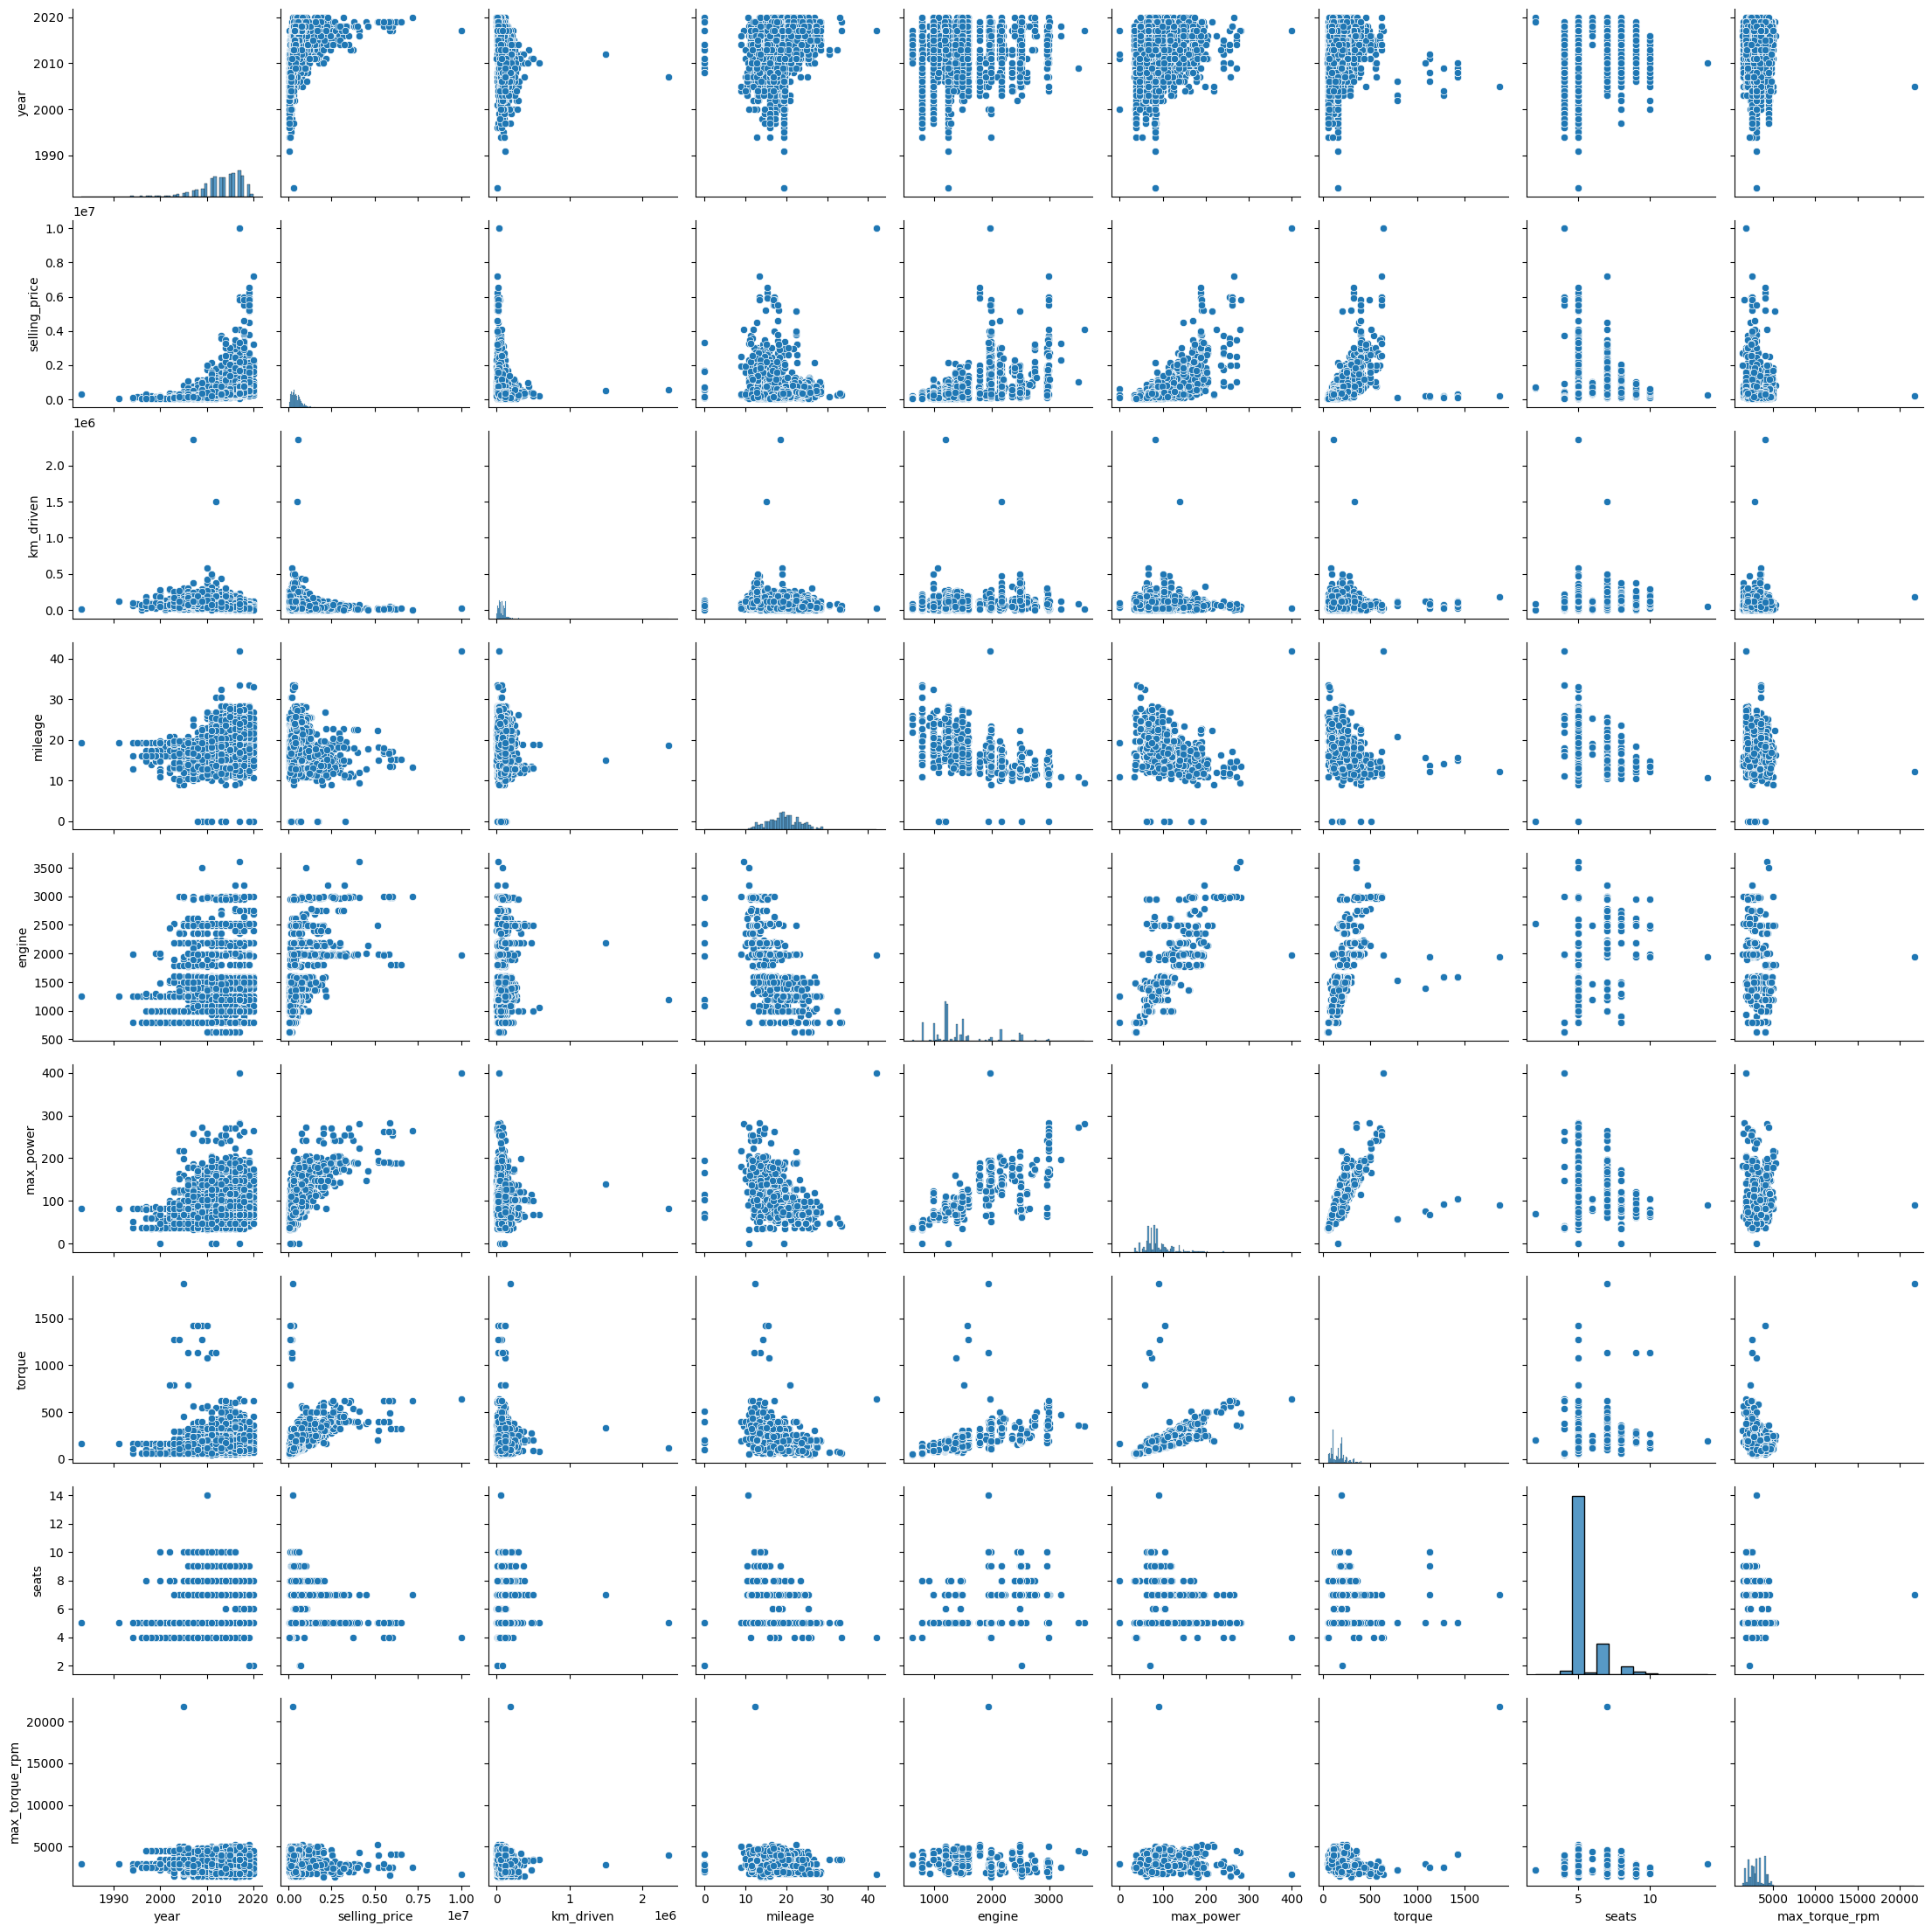

In [55]:
%matplotlib inline

plt.figure()
sns.pairplot(df_train[df_train.select_dtypes(include=['number']).columns.tolist()])
plt.show()

## Комментарий

Да, на графиках явно видно зависимости целевой переменой от некоторых признаков. Могу точно выделить зависимость от `year`, `km_driven`, `engine`, `max_power`, `torque`

Зависимость признаков также прослеживается: увидел зависимость между `max_power` и `engine`, `torque`, `torque` и `engine`, поэтому можно выдвинуть гипотезу о корреляции признаков


<Figure size 640x480 with 0 Axes>

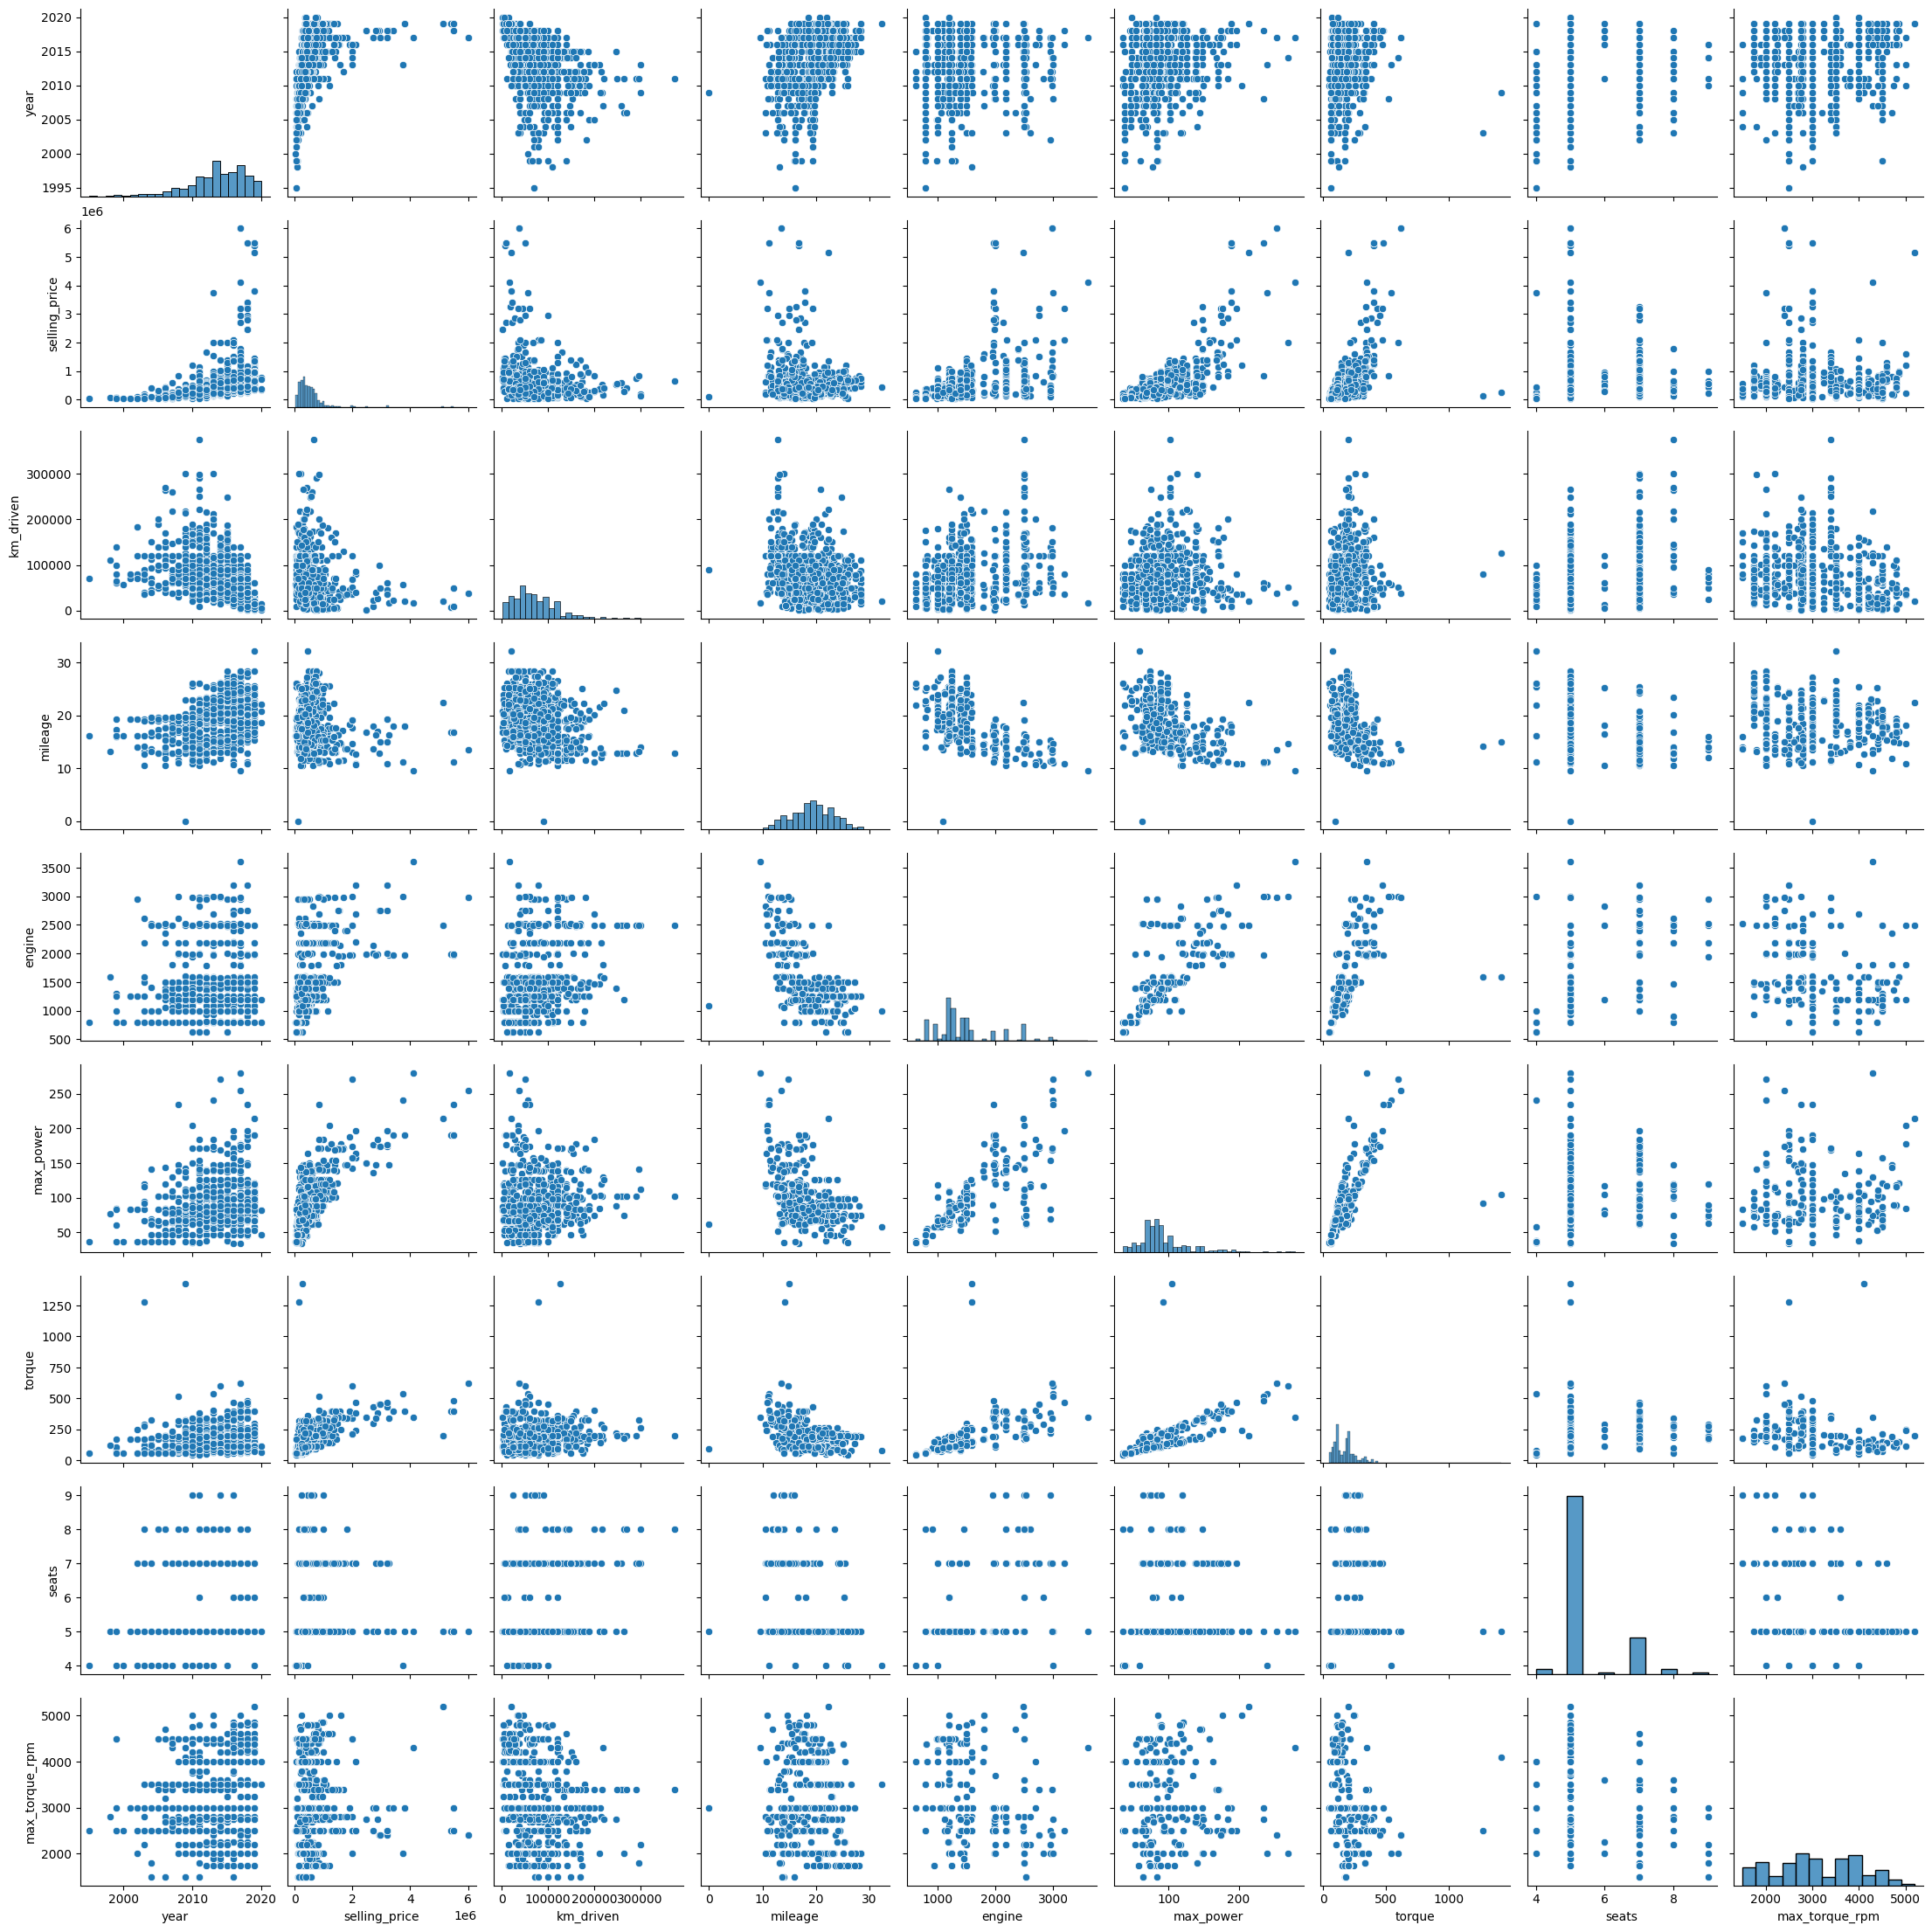

In [56]:
plt.figure()
sns.pairplot(df_test[df_test.select_dtypes(include=['number']).columns.tolist()])
plt.show()

## Комментарий

Как будто да, совокупности оказались похожи, потому что связь признаков между собой сохранилась примерно такой же, а распределения самих данных очень похожи (если сравнивать графики по диагонали)  

### **Задание 9 (0.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [x] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [x] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)

In [57]:
def draw_corr(df, method='pearson', ax=None):
    sns.heatmap(
        df[df.select_dtypes(include=['number']).columns].corr(method=method),
        cmap='crest',
        annot=True,
        ax=ax
    )

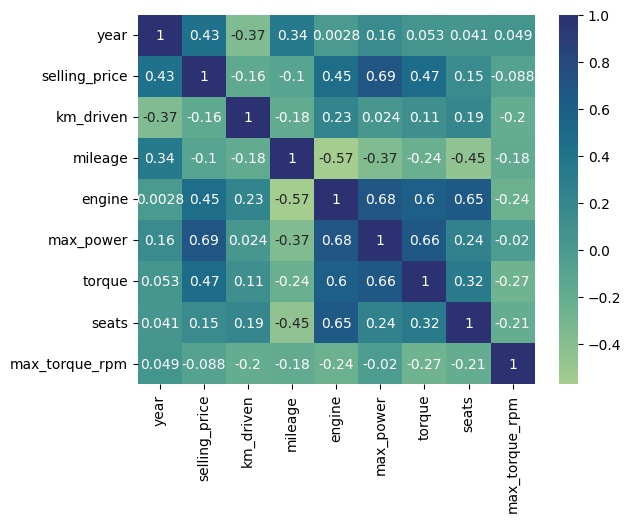

In [58]:
plt.figure()
draw_corr(df_train)
plt.show()

- [x] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?
 - Изучите типы корреляций в `pd.corr()`. Какую вы использовали по умолчанию?

## Комментарий

* Наименее скоррелированными признаками являются `engine` и `year` (`0.0028`), а также `max_power` и `km_driven` (`0.024`)

* Наибольшая положительная линейная зависимость наблюдается между `max_power` и `selling_price`, `engine` и `max_power`, `torque` и `max_power`, `engine` и `seats`

* Да, верно утверждать, что чем меньше год, тем больше километров проехала машина, так как корреляция между этими признаками имеет отрицательное значение, что говорит об обратной зависимости между ними

* Из [официальной документации](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) видно, что по умолчанию используется корреляция Пирсона. Также доступны корреляции Кендалла, Спирмана, а также можно передать свой `Callable` объект, который будет использоватьваться для подсчета корреляции.

### **Задание 10 (0.6 балла)**

По умолчанию `pd.corr` возвращает корреляцию Пирсона, говорящую о линейной взаимосвязи. Но зависимости существуют не только линейные! В этой задаче, попробуйте измерить другие способы вычисления корреляций.

- [x] Реализуйте корреляцию Спирмена/Кендала (на выбор) без использования библиотек (можно пользоваться только `numpy`). Сравните результаты вычисления с библиотечной реализацией
- [x] Сделайте выводы


Постройте матрицу корреляции [phik](https://pypi.org/project/phik/)
- [x] Проинтерпретируйте результаты


In [59]:
# Источники
# https://mathprofi.ru/koefficient_rangovoy_korrelyacii_spirmena.html


def rank(x):
    _, inverse, counts = np.unique(x, return_inverse=True, return_counts=True, axis=0)
    duplicated_indices = np.where(counts[inverse] > 1)[0]

    # получаем мапу дубль - индексы
    duplicated_indices_map = {}
    for duplicated_value in np.unique(x[duplicated_indices]):
        duplicated_indices_map[duplicated_value] = np.where(x == duplicated_value)

    # два раза argsort, чтобы получить соответствие
    # значение - ранг
    rank_x = (np.argsort(np.argsort(x)) + 1).astype(np.float32)

    for _, indices in duplicated_indices_map.items():
        rank_x[indices] = rank_x[indices].mean()

    return rank_x


def spearman_corr(x, y):
    rank_x = rank(x)
    rank_y = rank(y)

    assert rank_x.shape == rank_y.shape
    n = rank_x.shape[0]

    assert np.sum(rank_x) == np.sum(rank_y)
    
    r = 1 - (6 * (np.linalg.norm(rank_x - rank_y))**2) / (n * (n**2 - 1))
    
    return r

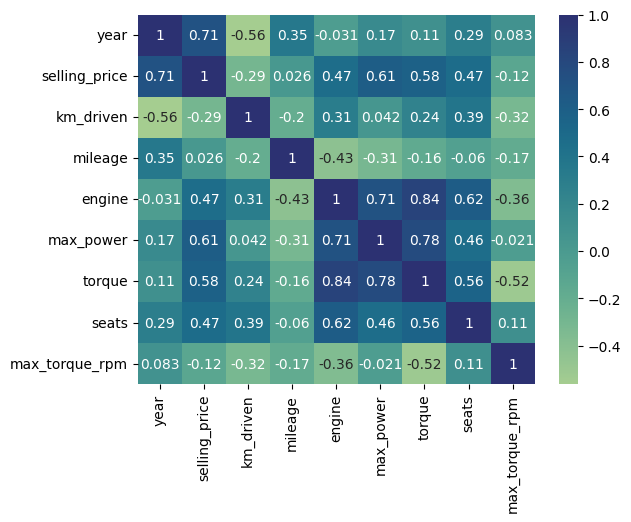

In [60]:
plt.figure()
draw_corr(df_train, spearman_corr)
plt.show()

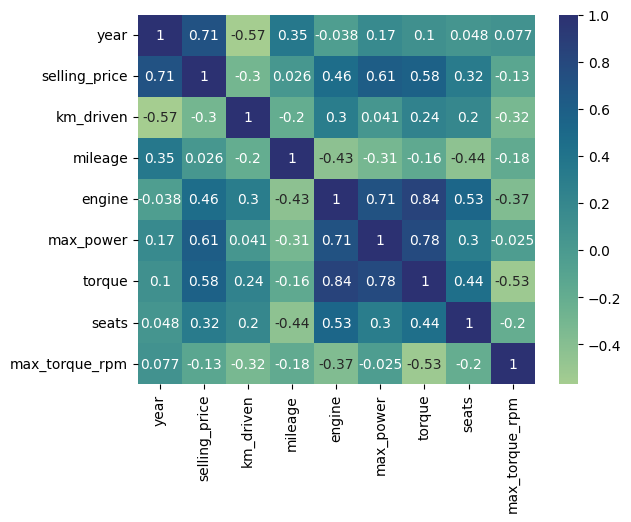

In [61]:
plt.figure()
draw_corr(df_train, 'spearman')
plt.show()

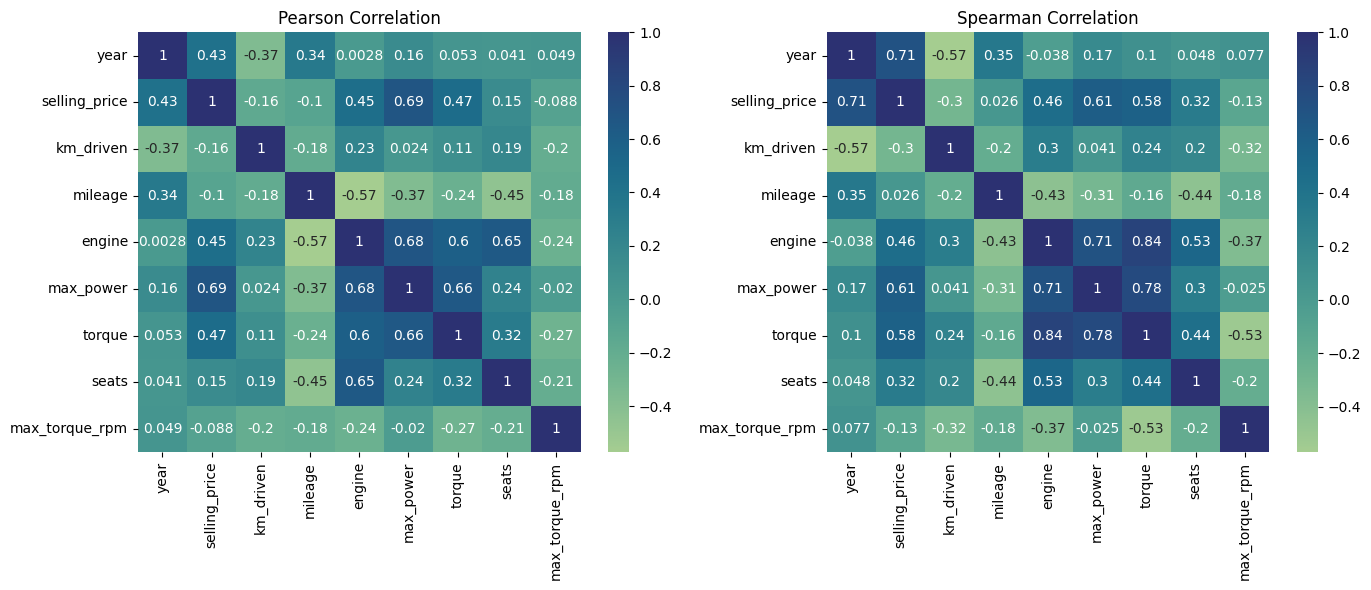

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

draw_corr(df_train, ax=axes[0])
axes[0].set_title('Pearson Correlation')

draw_corr(df_train, method='spearman', ax=axes[1])
axes[1].set_title('Spearman Correlation')

plt.tight_layout()
plt.show()

## Комментарий

Различия между самописной корреляцией Спирмана и библиотечной есть, иногда значения собственного метода слишком завышены (например, `year` и `seats`). Возможно это из-за того, что используемая мной формула дает только приближенный результат в случае, когда в признака встречаются повторяющиеся значения (ранги становятся дробными)

В целом оба вида корреляций полезно использовать при анализе данных, так как один хорошо улавливает линейные зависимости (корр. Пирсона), а другая нелинейные зависимости (Спирмана). При сравнении графиков видно, что некоторые признаки при корреляции Спирмана получили большее абсолютное значение, нежели у Пирсона, но я преподоложу, что это из-за того, что зависимость между ними нелинейная и поэтому Спирман показал большие коэффициенты. Если посмотреть на pairplot, то у некоторых признаков как раз так и есть - они обладают монотонной зависимостью  

interval columns not set, guessing: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']


/Users/layvvs/Desktop/HSE/Studying/Module1/ml/venv/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable name is large: 1924. Are you sure this is not an interval variable? Analysis for pairs of variables including name can be slow.
  warnings.warn(


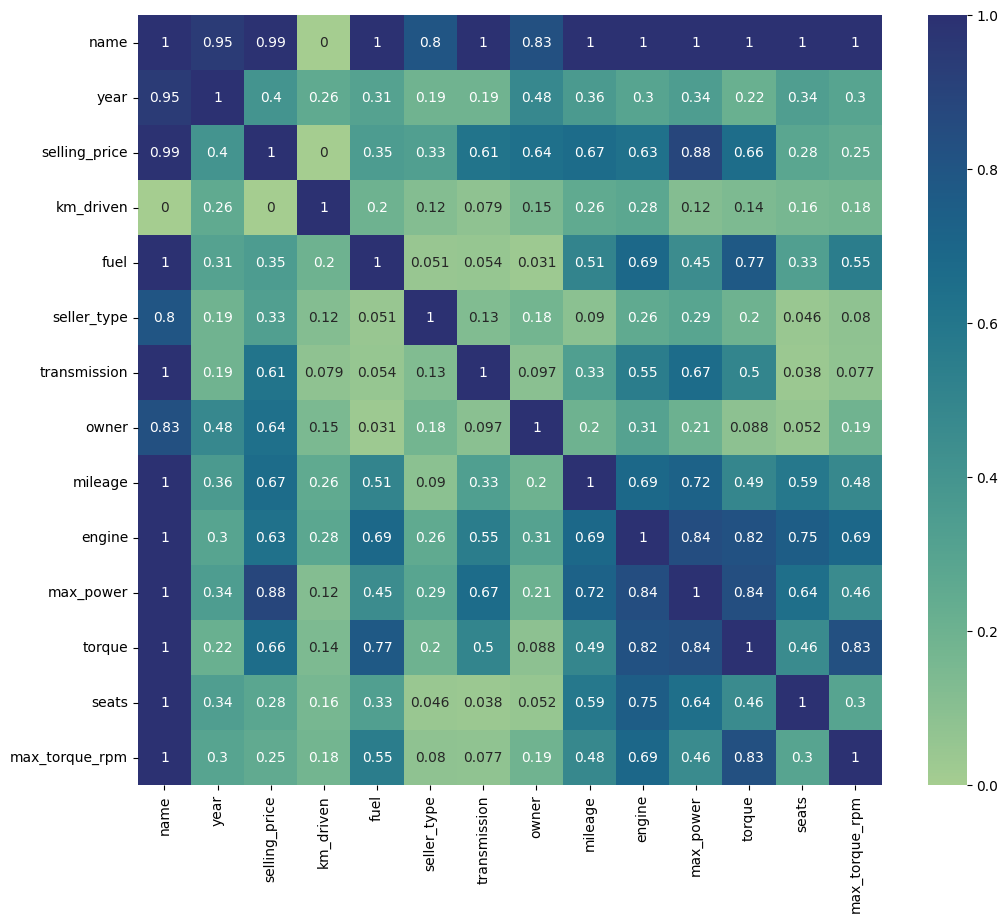

In [63]:
import phik

plt.figure(figsize=(12, 10))
sns.heatmap(
    df_train.phik_matrix(bins=20),
    cmap='crest',
    annot=True,
)
plt.show()


## Комментарий

Очень сильно смутила корреляция со значением `1` для признака `name`. GPT подсказал, что такое может встречаться из-за того, что name - это текстовый непредобработанный признак, который phik может начать принимать за категориальный с множеством значений, из-за чего появляется такая высокая корреляция.

В целом оценки корреляции сместились. Теперь можно наблюдать, что `selling_price` больше всего зависит от `map_power`, а не `year` или `km_driven`. Для `km_driven` корреляция вообще стала равна `0`, хотя там явно есть зависимость, в чем мы убедились выше.

Я пообщался в чате с коллегами + поизучал и понял, что занижения значений корреляции может происходить из-за недостатка бинов, а также сказали, что phik корреляция [больше подходит](https://medium.com/data-science/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7) для категориальных признаков, нежели чем для числовых и текстовых, поэтому попробуем построить ее только для них

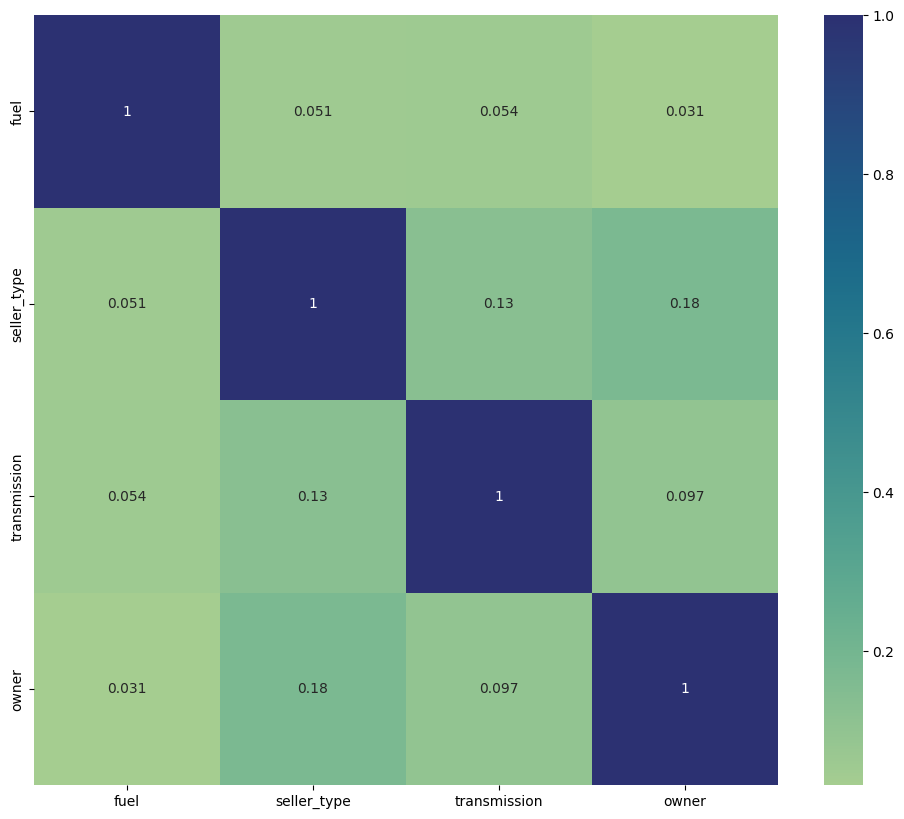

In [64]:
import phik

plt.figure(figsize=(12, 10))
cols_to_process = df_train.select_dtypes(include=['object']).columns.to_list()
cols_to_process.remove('name')
sns.heatmap(
    df_train[cols_to_process].phik_matrix(),
    cmap='crest',
    annot=True,
)
plt.show()

## Комменатарий

Теперь хитмап выглядит не так страшно. По нему можно увидеть, что связь между категориальными признаками практически отсутсвует, самое большое значение между `seller_type` и `owner`

# **Часть 2 (1.7 балла) | Модель только на вещественных признаках**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.

За задания этой части вы можете набрать 1.7 основных и 0.15 бонусных балла;

### **Задание 11 (0.05 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [65]:
df_numeric = df_train[df_train.select_dtypes(include='float').columns.to_list() + ['seats', 'selling_price']]

y_train = df_numeric['selling_price']
X_train = df_numeric.drop('selling_price', axis=1)

In [66]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mileage         5840 non-null   float64
 1   max_power       5840 non-null   float64
 2   torque          5840 non-null   float64
 3   max_torque_rpm  5840 non-null   float64
 4   seats           5840 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 228.2 KB


In [67]:
df_numeric = df_test[df_test.select_dtypes(include='float').columns.to_list() + ['seats', 'selling_price']]

y_test = df_numeric['selling_price']
X_test = df_numeric.drop('selling_price', axis=1)

In [68]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   mileage         1000 non-null   float64
 1   max_power       1000 non-null   float64
 2   torque          1000 non-null   float64
 3   max_torque_rpm  1000 non-null   float64
 4   seats           1000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 39.2 KB


## Комментарий

Раньше тут был еще assert, но позже его решили убрать. У кого-то из ребят получается 6 признаков, а у меня вышло всего 5

### **Задание 12. (0.2 балла)**

Построим нашу первую модель!
- [x] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [x] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

baseline_model = LinearRegression()

baseline_model.fit(X_train, y_train)

def calculate_metrics(y, x, model):
    print(
        'R2:', r2_score(y, model.predict(x)),
        'MSE:', MSE(y, model.predict(x))
    )

calculate_metrics(y_test, X_test, baseline_model)

R2: 0.5336016068425726 MSE: 268099114690.77524


## Комментарий

MSE достаточно большое, так как у нас, в целом, цена на квартиру имеет большие значения (в среднем 500-600 тысяч в трейне и тесте). По нему трудно судить о качестве модели, так у нас тут рубли в квадрате, а также нет верхней границы. MSE можно использовать уже для сравнения между моделями. 

R2 примерно 0.6, что не совсем плохо для бейзлайна. Благодаря ограниченности ([0, 1]) метрики, можно делать суждения о том хороша модель или нет. 

### **Задание 13 (0.15 балла)**

- [x] Реализуйте $R^2$ руками. Приведите формулу $R^2$ и объясните каждую компоненту метрики

## Комментарий

Коэффициент детерминации $R^2$ показывает долю дисперсии зависимой переменной, которую наша модель смогла объяснить и выглядит следующим образом:
$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_{i} - \^{y_{i}})^2}{\sum_{i=1}^n (y_{i} - \mu)^2} 
$$

В числителе мы видим квадрат ошибки, что напоминает MSE, если домножить числитель и знаменатель на $\frac{1}{n}$, а в знаменателе у нас, с учетом $\frac{1}{n}$, получается дисперсия. То есть выходит так, что мы нормализуем отклонение модели от истинных предсказаний при помощи дисперсии, которая из себя представляет ошибку наивной модели, предсказывающей среднее. То есть, если разбирать на примере, сейчас у нас модель имеет MSE = 1000 на тестовых данных, а дисперсия в тестовых данных равна 10000, то 
$$
R^2 = 1 - \frac{1000}{10000} = 0.9
$$
=> модель достаточно хорошо справляется

То есть мы тут сравниваем отклонение модели с реальными отклонениями в данных

Из единички мы вычитаем для удобства, чтобы качество модели шло от большего (от единички), к меньшему ($-\inf$)

In [70]:
def r2_score_custom(y_true, y_pred):
    y_true = y_true.to_numpy()
    return 1 - (np.sum((y_true - y_pred)**2)) / (np.sum((y_true - np.mean(y_true))**2))

In [71]:
r2_score_custom(y_test, baseline_model.predict(X_test))

0.5336016068425726

### **Бонус (0.15 балла)**

- [x] Реализуйте [$\text{adjusted}-R^2$](https://en.wikipedia.org/wiki/Coefficient_of_determination).
- [x] Объясните, когда применяется $\text{adjusted}-R^2$?

In [72]:
def adjusted_r2_score_custom(y_true, y_pred, n, p):
    y_true = y_true.to_numpy()
    r2_score = r2_score_custom(y_true, y_pred)
    return 1 - ((1 - r2_score) * (n - 1) / (n - p -1))

## Комментарий

$Adjusted-R^2$ это попытка объяснения явления, что $R^2$ повышается при добавлении новых признаков. То есть даже при добавлении какого-нибудь шума показатель $R^2$ может стать больше, что может вводить в заблуждение. Применение $Adjusted-R^2$ решает эту проблему при помощи добавления степеней свободы оценки дисперсии модели и дисперсии в данных.

$Adjusted-R^2$ может быть полезен, например, на этапе селекции фичей, когда мы пытаемся понять на сколько тот или иной признак влияет на нашу модель - в этом случае данная метрика будет расти или падать, на что как раз можно опереться. Также ее можно использовать при сравнении моделей с разным количеством признаков

### **Задание 14 (0.05 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [x] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [73]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

scaled_model = LinearRegression()
scaled_model.fit(scaled_X_train, y_train)

calculate_metrics(y_test, scaled_X_test, scaled_model)

R2: 0.533601606842572 MSE: 268099114690.7757


### **Задание 15 (0.1 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [x] Какой признак оказался наиболее информативным в предсказании цены?

In [74]:
def most_valuable_feature(x, model):
    model_weights = model.coef_
    print(
        'All weights:', list(zip(x.columns, model_weights)),
        '\nThe most valuable feature:', x.columns[np.argmax(np.abs(model_weights))],
        '\nMax weight', np.max(np.abs(model_weights)), 
        '\nMin weight', np.min(np.abs(model_weights)),
        '\nMean weight', np.mean(model_weights)
    )

most_valuable_feature(X_train, scaled_model)

All weights: [('mileage', 102604.07561700206), ('max_power', 407146.0208018009), ('torque', -7378.926804222529), ('max_torque_rpm', -16932.629790422197), ('seats', 26552.970926609767)] 
The most valuable feature: max_power 
Max weight 407146.0208018009 
Min weight 7378.926804222529 
Mean weight 102398.3021501536


## Комментарий
Наибольший вес получился у признака `max_power`. Значения признаков очень разные по размерности, что может сигнализировать о переобучении или мультиколлинеарности

### **Задание 16 (0.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [x] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [x] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [75]:
from sklearn.linear_model import Lasso

lasso_model = Lasso()

lasso_model.fit(scaled_X_train, y_train)

calculate_metrics(y_test, scaled_X_test, lasso_model)

R2: 0.5336023993634109 MSE: 268098659127.1665


In [76]:
most_valuable_feature(X_train, lasso_model)

All weights: [('mileage', 102603.24832694422), ('max_power', 407146.1077451303), ('torque', -7377.629337081212), ('max_torque_rpm', -16931.824988536246), ('seats', 26551.332342260717)] 
The most valuable feature: max_power 
Max weight 407146.1077451303 
Min weight 7377.629337081212 
Mean weight 102398.24681774355


## Комментарий

Скорее всего $L_{1}$ регуляризация не смогла занулить веса из-за того, что их значения находятся далеко от нуля. Вообще при сравнении признаков с предыдущей моделью легко заметить, что и сами веса не сильно поменялись

### **Задание 17. Финальный рывок (0.4 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [X] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Что значит каждый параметр `param_grid`, который вы заполняли для `GridSearch`? Опишите каждый
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 1, 0.5, 25, 50, 75, 100, 150, 200, 300, 10000, 10100, 11000, 100000],
}

lasso_cv = Lasso()
grid_search_lasso = GridSearchCV(lasso_cv, scoring='r2', cv=10, n_jobs=-1, param_grid=param_grid, verbose=1)
grid_search_lasso.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1, 0.5, 25, 50, 75, 100, 150, 200, 300,
                                   10000, 10100, 11000, 100000]},
             scoring='r2', verbose=1)

In [78]:
print("Best params:", grid_search_lasso.best_params_)
print("Best R2:", grid_search_lasso.best_score_)

Best params: {'alpha': 10000}
Best R2: 0.47339432944339654


In [79]:
most_valuable_feature(X_train, grid_search_lasso.best_estimator_)

All weights: [('mileage', 80417.37454581787), ('max_power', 388210.3494969226), ('torque', 0.0), ('max_torque_rpm', -12839.48825336316), ('seats', 9653.577542184115)] 
The most valuable feature: max_power 
Max weight 388210.3494969226 
Min weight 0.0 
Mean weight 93088.36266631227


In [80]:
calculate_metrics(y_test, scaled_X_test, grid_search_lasso)

R2: 0.5272937273300038 MSE: 271725063960.12656


## Комментарий

* GridSearch обучил всего 14 * 10 = 140 моделей. Число получается при перемоножении количества значений каждого гиперпараметра и количества фолдов.

* Я использовал в param_grid значение alpha, остальные параметры Lasso  никак положительно не повлияли на результат модели. alpha - это коэффициент регуляризации

* Значение коэффициента регуляризации 10000 оказалось наилучшим. Занулился вес torque.

По поводу того, что оценка на тестовой выборке оказалась выше той, что получилась на тесте - загадка. Мне в чате подсказали, что это может быть из-за дубликатов или распределния данных, но выше мы выяснили, что распределения выборок на pairplot не сильно отличаются между собой, а дубли мы и правда никак не убирали, поэтому склоняюсь ко-второму варианту

**Ваша задача 2:**

- [x] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [x] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [81]:
# your code here
from sklearn.linear_model import ElasticNet

param_grid = {
    'alpha': [0.01, 0.05, 0.08, 0.088, 0.09, 0.092, 0.097, 0.1, 0.2, 1, 0.5],
    'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.33, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
}

elasticnet = ElasticNet()
grid_search_elastic = GridSearchCV(elasticnet, scoring='r2', cv=10, n_jobs=-1, param_grid=param_grid, verbose=1)
grid_search_elastic.fit(scaled_X_train, y_train)

Fitting 10 folds for each of 154 candidates, totalling 1540 fits


GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.05, 0.08, 0.088, 0.09, 0.092, 0.097,
                                   0.1, 0.2, 1, 0.5],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.33, 0.35, 0.4,
                                      0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             scoring='r2', verbose=1)

In [82]:
print("Best params:", grid_search_elastic.best_params_)
print("Best R2:", grid_search_elastic.best_score_)

Best params: {'alpha': 0.09, 'l1_ratio': 0.3}
Best R2: 0.47599375377674064


In [83]:
most_valuable_feature(X_train, grid_search_elastic.best_estimator_)

All weights: [('mileage', 84229.3304352561), ('max_power', 361018.68628006347), ('torque', 20185.91243507353), ('max_torque_rpm', -14238.79399231397), ('seats', 20040.02842277115)] 
The most valuable feature: max_power 
Max weight 361018.68628006347 
Min weight 14238.79399231397 
Mean weight 94247.03271617006


In [84]:
calculate_metrics(y_test, scaled_X_test, grid_search_elastic)

R2: 0.5146505368806359 MSE: 278992730864.7985


## Комментарий

* GridSearch обучал 10 * 11 * 14 = 1540 моделей.

* Самыми лучшими гиперпараметрами оказались 'alpha': 0.09, 'l1_ratio': 0.3

### **Задание 18 (0.35 балла)**

И так, вы обучили все варианты регуляризаций, доступные в sklearn, но не все, что мы обсудили на занятии! И следующее задание о забытой - $L0$ регуляризации.


**Ваша задача:**>
- [x] Реализуйте модель с $L0$-регуляризаицей.
- [x] Обучите модель на данных и проанализируйте результат, экспериментируя с коэффициенитом регуляризации
- [x] Проанализируйте результаты обучения

**Важно:**

Вопреки тому, что L0 не реализована в стандартных пакетах, концепция данной регуляризации не является мертвой. Она может встречаться в [статьях](https://arxiv.org/abs/1712.01312) и экспериментах.



In [85]:
from itertools import combinations

class L0Regression:
    def __init__(self, alpha=0):
        self.alpha = alpha
        self.best_loss = float('inf')
        self.best_w = None
        self.best_subset = None
    
    def fit(self, x, y):
        n, d = x.shape
        self.best_loss = float('inf')
        
        for k in range(d + 1):
            for subset in combinations(range(d), k):
                Xs = x[:, subset]
                Xs = np.column_stack([np.ones(n), Xs])

                ws, *_ = np.linalg.lstsq(Xs, y, rcond=None)

                w = np.zeros(d + 1)
                w[0] = ws[0]
                w[1:1+len(subset)] = ws[1:]
                
                y_pred = w[0] + x @ w[1:]
                loss = np.sum((y - y_pred)**2) + self.alpha * len(subset)

                if loss < self.best_loss:
                    self.best_loss = loss
                    self.best_subset = subset
                    self.best_w = w

    def predict(self, x):
        return self.best_w[0] + x @ self.best_w[1:]


In [86]:
for alpha in [0, 0.1, 0.5, 1, 2, 5]:
    model = L0Regression(alpha)
    model.fit(scaled_X_train, y_train)
    print('*' * 10)
    print('alpha:', alpha, 'subset:', model.best_subset, 'nonzeros:', model.best_subset)
    calculate_metrics(y_test, scaled_X_test, model)
    print('*' * 10)

**********
alpha: 0 subset: (0, 1, 2, 3, 4) nonzeros: (0, 1, 2, 3, 4)
R2: 0.5336016068425706 MSE: 268099114690.77643
**********
**********
alpha: 0.1 subset: (0, 1, 2, 3, 4) nonzeros: (0, 1, 2, 3, 4)
R2: 0.5336016068425706 MSE: 268099114690.77643
**********
**********
alpha: 0.5 subset: (0, 1, 2, 3, 4) nonzeros: (0, 1, 2, 3, 4)
R2: 0.5336016068425706 MSE: 268099114690.77643
**********
**********
alpha: 1 subset: (0, 1, 2, 3, 4) nonzeros: (0, 1, 2, 3, 4)
R2: 0.5336016068425706 MSE: 268099114690.77643
**********
**********
alpha: 2 subset: (0, 1, 2, 3, 4) nonzeros: (0, 1, 2, 3, 4)
R2: 0.5336016068425706 MSE: 268099114690.77643
**********
**********
alpha: 5 subset: (0, 1, 2, 3, 4) nonzeros: (0, 1, 2, 3, 4)
R2: 0.5336016068425706 MSE: 268099114690.77643
**********


## Комментарий

При обучении с разными параметрами регуляризации результат не менялся. Я так понимаю, что во всех подходах оказывалась лучше та модель, у которой наибольшее количество признаков, влияние регуляризации не увидел

# **Часть 3 (0.5 балла) | Добавляем категориальные фичи**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.

За эту часть можно набрать 0.5 основных балла.



### **Задание 19 (0.1 балла)**

Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

- [x] Предобработайте столбец `name`, чтобы избежать его удаления

In [87]:
X_train_cat = pd.concat([X_train, df_train[df_train.select_dtypes(include='object').columns]], axis=1)

X_test_cat = pd.concat([X_test, df_test[df_test.select_dtypes(include='object').columns]], axis=1)

In [88]:
X_train_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840,5840
unique,1924,4,3,2,5
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
freq,91,3177,5223,5336,3603


In [ ]:
X_test_cat.describe(include='object')

,name,fuel,seller_type,transmission,owner
count,1000,1000,1000,1000,1000
unique,621,4,3,2,5
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner
freq,15,534,837,877,623


## Комментарий

Выше мы выясняли, что у name очень много уникальных значений по сравнению с остальными категориальными признакми. Чтобы не матрица плана не становилась слишком разреженной из-за огромного количества столбцов при OHE, будем использовать TargetEncoding

In [90]:
import category_encoders

# Используем LOO, чтобы избежать даталика
loo_encoder = category_encoders.LeaveOneOutEncoder(cols=['name'])
X_train_loo = loo_encoder.fit_transform(X_train_cat, y_train)
X_test_loo = loo_encoder.transform(X_test_cat)

In [91]:
X_train_loo

,mileage,max_power,torque,max_torque_rpm,seats,name,fuel,seller_type,transmission,owner
0,23.40,74.00,190.000,2000.0,5,586088.833333,Diesel,Individual,Manual,First Owner
1,21.14,103.52,250.000,2500.0,5,625000.000000,Diesel,Individual,Manual,Second Owner
2,23.00,90.00,219.744,2750.0,5,522960.091096,Diesel,Individual,Manual,First Owner
3,16.10,88.20,112.815,4500.0,5,170000.000000,Petrol,Individual,Manual,First Owner
4,20.14,81.86,113.750,4000.0,5,500000.000000,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...,...,...
5835,17.92,62.10,96.100,3000.0,5,181809.476190,Petrol,Individual,Manual,First Owner
5836,18.90,67.10,90.000,3500.0,5,271500.000000,Petrol,Individual,Manual,Second Owner
5837,18.50,82.85,113.700,4000.0,5,298749.916667,Petrol,Individual,Manual,First Owner
5838,16.80,110.00,235.440,2750.0,5,236000.000000,Diesel,Individual,Manual,Fourth & Above Owner


In [92]:
X_test_loo

,mileage,max_power,torque,max_torque_rpm,seats,name,fuel,seller_type,transmission,owner
0,14.00,112.00,260.000,2200.0,7,522960.091096,Diesel,Individual,Manual,First Owner
1,21.50,108.50,260.000,2750.0,5,522960.091096,Diesel,Individual,Manual,First Owner
2,12.90,130.00,172.000,4300.0,5,522960.091096,Petrol,Individual,Automatic,First Owner
3,25.10,98.60,200.000,1750.0,5,698999.900000,Diesel,Individual,Manual,First Owner
4,16.50,65.00,96.000,3000.0,5,522960.091096,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...
995,19.81,68.05,99.040,4500.0,5,270357.071429,Petrol,Individual,Manual,Second Owner
996,18.60,81.83,114.700,4000.0,5,650000.000000,Petrol,Individual,Manual,Second Owner
997,23.00,90.00,219.744,2750.0,5,522960.091096,Diesel,Individual,Manual,First Owner
998,20.36,78.90,111.800,4000.0,5,263333.333333,Petrol,Individual,Manual,First Owner


### **Задание 20 (0.1 балла)**

- [x] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования.

In [93]:
X_train_cat = pd.get_dummies(X_train_loo, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)
X_test_cat = pd.get_dummies(X_test_loo, columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats'], drop_first=True)

In [94]:
X_train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mileage                       5840 non-null   float64
 1   max_power                     5840 non-null   float64
 2   torque                        5840 non-null   float64
 3   max_torque_rpm                5840 non-null   float64
 4   name                          5840 non-null   float64
 5   fuel_Diesel                   5840 non-null   bool   
 6   fuel_LPG                      5840 non-null   bool   
 7   fuel_Petrol                   5840 non-null   bool   
 8   seller_type_Individual        5840 non-null   bool   
 9   seller_type_Trustmark Dealer  5840 non-null   bool   
 10  transmission_Manual           5840 non-null   bool   
 11  owner_Fourth & Above Owner    5840 non-null   bool   
 12  owner_Second Owner            5840 non-null   bool   
 13  own

In [95]:
X_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mileage                       1000 non-null   float64
 1   max_power                     1000 non-null   float64
 2   torque                        1000 non-null   float64
 3   max_torque_rpm                1000 non-null   float64
 4   name                          1000 non-null   float64
 5   fuel_Diesel                   1000 non-null   bool   
 6   fuel_LPG                      1000 non-null   bool   
 7   fuel_Petrol                   1000 non-null   bool   
 8   seller_type_Individual        1000 non-null   bool   
 9   seller_type_Trustmark Dealer  1000 non-null   bool   
 10  transmission_Manual           1000 non-null   bool   
 11  owner_Fourth & Above Owner    1000 non-null   bool   
 12  owner_Second Owner            1000 non-null   bool   
 13  owne

In [96]:
X_test_cat = X_test_cat.reindex(columns=X_train_cat.columns, fill_value=0)

In [97]:
X_test_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   mileage                       1000 non-null   float64
 1   max_power                     1000 non-null   float64
 2   torque                        1000 non-null   float64
 3   max_torque_rpm                1000 non-null   float64
 4   name                          1000 non-null   float64
 5   fuel_Diesel                   1000 non-null   bool   
 6   fuel_LPG                      1000 non-null   bool   
 7   fuel_Petrol                   1000 non-null   bool   
 8   seller_type_Individual        1000 non-null   bool   
 9   seller_type_Trustmark Dealer  1000 non-null   bool   
 10  transmission_Manual           1000 non-null   bool   
 11  owner_Fourth & Above Owner    1000 non-null   bool   
 12  owner_Second Owner            1000 non-null   bool   
 13  owne

### **Задание 21 (0.2 балла)**

OHE — базовый алгоритм преобразования категориальных признаков, но и с ним нужно быть аккуратными.

**Ответьте на вопросы:**


* Как корректно работать с OHE преобразованием?
* Почему мы удаляем один столбец?
* Пусть из $n$ признаков мы получили $n-1$ столбец, из которых $k < n -1$ оказались не важными по весам модели. Корректно ли их удалить?

## Комментарий

* Наверное основное - это использовать fit только на трейн данных, а после уже transform на тестовых. Это касается не только OHE, но и других энкодеров, а также скейлеров. Это делается во избежании утечки данных
* Мы удаляем один столбец с целью избавления от мультиколлинеарности. Дело в том, что если сложить все столбцы, полученные из OHE, с коэффициентом 1, то в итоге получится вектор, который содержит единички - это по определению линейная зависимость, а удаление одного из столбцов нам помогает от нее избавиться, при этом логика кодирования не сломается
* Вполне можно удалить, если при этом такое удаление будет учитываться и далее при кодироваие новых данных, поступающих в обученную модель. Таким образом мы упрощаем нашу модель

### **Задание 22 (0.1 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [x] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [x] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [98]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler # Чтобы значения были от 0 до 1, так как мы используем OHE

scaler = MinMaxScaler()
scaler.fit(X_train_cat)

scaled_X_train_cat = scaler.transform(X_train_cat)
scaled_X_test_cat = scaler.transform(X_test_cat)

param_grid = {
    'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 5, 10, 100, 150, 200]
}

ridge_model = Ridge()
ridge_gridsearch = GridSearchCV(ridge_model, param_grid=param_grid, cv=10, n_jobs=-1, scoring='r2')
ridge_gridsearch.fit(scaled_X_train_cat, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1, 5, 10, 100, 150, 200]},
             scoring='r2')

In [99]:
print("Best params:", ridge_gridsearch.best_params_)
print("Best R2:", ridge_gridsearch.best_score_)

Best params: {'alpha': 0.6}
Best R2: 0.7009006808391262


In [100]:
most_valuable_feature(X_train_cat, ridge_gridsearch.best_estimator_)

All weights: [('mileage', 648932.7325406814), ('max_power', 2718136.972439164), ('torque', 168865.03208788976), ('max_torque_rpm', -919292.3849655372), ('name', 3492939.738778926), ('fuel_Diesel', -47583.15142473324), ('fuel_LPG', 78126.73437702468), ('fuel_Petrol', 29837.132380039006), ('seller_type_Individual', -91134.8817607003), ('seller_type_Trustmark Dealer', -68348.30224013039), ('transmission_Manual', -247577.35816690268), ('owner_Fourth & Above Owner', -178190.916508231), ('owner_Second Owner', -104054.89402198295), ('owner_Test Drive Car', 1219346.6235798425), ('owner_Third Owner', -140619.4018583497), ('seats_4', 15070.549899558968), ('seats_5', -219769.6895329792), ('seats_6', -213851.99583124925), ('seats_7', -166531.48238083665), ('seats_8', -122434.93514493559), ('seats_9', -102055.9923635181), ('seats_10', -177202.98574344994), ('seats_14', -228353.47178790308)] 
The most valuable feature: name 
Max weight 3492939.738778926 
Min weight 15070.549899558968 
Mean weight 23

In [101]:
calculate_metrics(y_test, scaled_X_test_cat, ridge_gridsearch)

R2: 0.7244029014974904 MSE: 158421082070.3437


## Комментарий

Качество прогноза однозначно улучшилось, но проблемы с весами и тем, что трейн лучше теста - не ушли 

# **Часть 4 - бонусная (1 балл) | Feature Engineering**

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 1-х балла в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [102]:
# Попробуем добавить нелинейных зависимостей из п.1 и отлогарифмировать цену на авто, чтобы избавиться от перекосов из п.3 + добавим некоторые признаки, которые мы раньше опустили
X_train_cat_ = X_train_cat.copy()
X_test_cat_ = X_test_cat.copy()

y_train_ = y_train.copy()
y_test_ = y_test.copy()


X_train_cat_['year'] = df_train['year']
X_train_cat_['km_driven'] = df_train['km_driven']
X_train_cat_['year_squared'] = df_train['year'] ** 2
X_train_cat_['km_driven_squared'] = df_train['km_driven'] ** 2

X_test_cat_['year'] = df_test['year']
X_test_cat_['km_driven'] = df_test['km_driven']
X_test_cat_['year_squared'] = df_test['year'] ** 2
X_test_cat_['km_driven_squared'] = df_test['km_driven'] ** 2


y_train_ = np.log1p(y_train_)
y_test_ = np.log1p(y_test_)


scaler = MinMaxScaler()
scaler.fit(X_train_cat_)

scaled_X_train_cat_ = scaler.transform(X_train_cat_)
scaled_X_test_cat_ = scaler.transform(X_test_cat_)


ridge_grid_search_loged_target = GridSearchCV(ridge_model, param_grid=param_grid, cv=10, n_jobs=-1, scoring='r2')
ridge_grid_search_non_loged_target = GridSearchCV(ridge_model, param_grid=param_grid, cv=10, n_jobs=-1, scoring='r2')

ridge_grid_search_loged_target.fit(scaled_X_train_cat_, y_train_)
ridge_grid_search_non_loged_target.fit(scaled_X_train_cat_, y_train)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                   0.9, 1, 5, 10, 100, 150, 200]},
             scoring='r2')

In [103]:
print("Loged target best params:", ridge_grid_search_loged_target.best_params_)
print("Loged target best R2:", ridge_grid_search_loged_target.best_score_)

print("Non loged target best params:", ridge_grid_search_non_loged_target.best_params_)
print("Non loged best R2:", ridge_grid_search_non_loged_target.best_score_)

Loged target best params: {'alpha': 0.01}
Loged target best R2: 0.8450455272000875
Non loged target best params: {'alpha': 0.01}
Non loged best R2: 0.7328923635922653


In [104]:
# loged
most_valuable_feature(X_train_cat_, ridge_grid_search_loged_target.best_estimator_)

All weights: [('mileage', 0.05177490772097402), ('max_power', 3.5992954507518014), ('torque', -0.2843918498678378), ('max_torque_rpm', -0.04324921100563068), ('name', 1.8828507742512564), ('fuel_Diesel', 0.2481793516364313), ('fuel_LPG', 0.10628928769761811), ('fuel_Petrol', 0.01821131615140792), ('seller_type_Individual', -0.07269424283875305), ('seller_type_Trustmark Dealer', 0.07641250414581494), ('transmission_Manual', -0.1434125240953348), ('owner_Fourth & Above Owner', -0.1392208520435897), ('owner_Second Owner', -0.07332579766478955), ('owner_Test Drive Car', -0.212084210628679), ('owner_Third Owner', -0.09386814233643039), ('seats_4', -0.36325436666252775), ('seats_5', -0.06211208724447797), ('seats_6', -0.14829285141241774), ('seats_7', 0.07745076993338608), ('seats_8', 0.1728407994775738), ('seats_9', 0.1659423579804919), ('seats_10', 0.0667907147813177), ('seats_14', -0.3471683991107994), ('year', -0.3416705714747101), ('km_driven', -1.8145098401535766), ('year_squared', 3.9

In [105]:
# non loged
most_valuable_feature(X_train_cat_, ridge_grid_search_non_loged_target.best_estimator_)

All weights: [('mileage', 73987.10124920428), ('max_power', 2643702.7654643506), ('torque', 208480.30680721934), ('max_torque_rpm', -1343897.621294351), ('name', 3112230.9906676644), ('fuel_Diesel', -43138.43843252025), ('fuel_LPG', 133551.75755986708), ('fuel_Petrol', 5480.100889942299), ('seller_type_Individual', -73465.05494766575), ('seller_type_Trustmark Dealer', -102991.413938602), ('transmission_Manual', -205245.55193409906), ('owner_Fourth & Above Owner', -36362.405376239745), ('owner_Second Owner', -36027.50742338465), ('owner_Test Drive Car', 1551661.991617037), ('owner_Third Owner', -31911.11344120175), ('seats_4', 221521.73210620263), ('seats_5', -125147.31782141347), ('seats_6', -223082.0486468898), ('seats_7', -133521.45178495577), ('seats_8', -72102.0453514932), ('seats_9', -88100.38615582405), ('seats_10', -116440.58635609431), ('seats_14', -318482.59438724635), ('year', -1492875.7719136272), ('km_driven', -2049021.7250435809), ('year_squared', 2372723.5449869796), ('km

In [106]:
# loged
calculate_metrics(y_test_, scaled_X_test_cat_, ridge_grid_search_loged_target)

print(
    'exp R2:', r2_score(y_test, np.expm1(ridge_grid_search_loged_target.predict(scaled_X_test_cat_))),
    'exp MSE:', MSE(y_test, np.expm1(ridge_grid_search_loged_target.predict(scaled_X_test_cat_)))
)


R2: 0.8624686287711893 MSE: 0.09837647564504744
exp R2: 0.17758761572015058 exp MSE: 472746122994.7551


In [107]:
# non loged
calculate_metrics(y_test, scaled_X_test_cat_, ridge_grid_search_non_loged_target)

R2: 0.7413752532602481 MSE: 148664889620.77005


## Комментарий

После возвращения некоторых старых и добавления новых полиноминальных признаков модель немного улучшилась, по сравнению с тем, чтобы было в последнем пункте части 3. После того, как мы дополнительно отлогарифмировали цену, то качество возрасло еще больше, но сам GridSearch не учитывал лог скейл, но после переподсчета качество модели оказалось очень маленьким

# **Часть 4. | Бизнесовая (0.5 балла)**

### **Задание 23 (0.25 балла)**

В мире бизнеса очень важно давать оценку качества модели понятную бизнесу, поэтому иногда заказчики приходят с кастомными метриками. Попробуем сделать такую для нашей задачи.

**Описание метрики:**

Среди всех предсказанных цен на авто нужно посчитать долю прогнозов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

**Ваша задача:**

- [x] Реализуйте метрику `business_metric`
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса

In [108]:
def business_metrics(y_true, y_pred, threshold=0.1):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    within_tolerance = np.abs(y_pred - y_true) / y_true <= threshold
    return np.mean(within_tolerance)


print('ridge_grid_search_loged_target:', business_metrics(y_test, np.expm1(ridge_grid_search_loged_target.best_estimator_.predict(scaled_X_test_cat_)))) 
print('ridge_grid_search_non_loged_target:', business_metrics(y_test, ridge_grid_search_non_loged_target.best_estimator_.predict(scaled_X_test_cat_))) 
print('ridge_gridsearch:', business_metrics(y_test, ridge_gridsearch.best_estimator_.predict(scaled_X_test_cat))) 
print('baseline_model:', business_metrics(y_test, baseline_model.predict(X_test))) 
print('scaled_model:', business_metrics(y_test, scaled_model.predict(scaled_X_test)))
print('lasso_model:', business_metrics(y_test, lasso_model.predict(scaled_X_test))) 
print('grid_search_lasso:', business_metrics(y_test, grid_search_lasso.best_estimator_.predict(scaled_X_test))) 
print('grid_search_elastic:', business_metrics(y_test, grid_search_elastic.best_estimator_.predict(scaled_X_test))) 

ridge_grid_search_loged_target: 0.291
ridge_grid_search_non_loged_target: 0.271
ridge_gridsearch: 0.214
baseline_model: 0.153
scaled_model: 0.153
lasso_model: 0.153
grid_search_lasso: 0.141
grid_search_elastic: 0.142


## Комментарий 

Лучше всего себя на бизнесовой метрике показала последняя модель, у которой мы сделали логарифмизацию, но в любом случае выделяются именно те, которые получились после инжиниринга фичей

### **Задание 24 (0.25 балла)**

Но у бизнеса не всегда есть идеи и иногда задача на выбор метрики делегируется вам.

**Задание:**

- [x] Придумайте и реализуйте другую кастомную метрику с учетом того, что модель не должна сильно ошибаться в прогнозе, но недопрогноз для модели, согласно мнению бизнеса, хуже, чем перепрогноз.
- [x] Посчитайте метрику для всех обученных моделей и определеите, какаю лучше всего решает задачу бизнеса



In [109]:

def another_business_metrics(y_true, y_pred, underprediction=2., overprediction=1.):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    under_mask = y_pred < y_true
    weights = np.ones_like(y_true) * overprediction
    weights[under_mask] = underprediction

    return np.mean(weights * np.abs(y_pred - y_true))


print('ridge_grid_search_loged_target:', another_business_metrics(y_test, np.expm1(ridge_grid_search_loged_target.best_estimator_.predict(scaled_X_test_cat_)))) 
print('ridge_grid_search_non_loged_target:', another_business_metrics(y_test, ridge_grid_search_non_loged_target.best_estimator_.predict(scaled_X_test_cat_))) 
print('ridge_gridsearch:', another_business_metrics(y_test, ridge_gridsearch.best_estimator_.predict(scaled_X_test_cat))) 
print('baseline_model:', another_business_metrics(y_test, baseline_model.predict(X_test))) 
print('scaled_model:', another_business_metrics(y_test, scaled_model.predict(scaled_X_test)))
print('lasso_model:', another_business_metrics(y_test, lasso_model.predict(scaled_X_test))) 
print('grid_search_lasso:', another_business_metrics(y_test, grid_search_lasso.best_estimator_.predict(scaled_X_test))) 
print('grid_search_elastic:', another_business_metrics(y_test, grid_search_elastic.best_estimator_.predict(scaled_X_test))) 

ridge_grid_search_loged_target: 284378.9536989471
ridge_grid_search_non_loged_target: 289206.7219572585
ridge_gridsearch: 309561.8702484095
baseline_model: 425830.65587022493
scaled_model: 425830.6558702249
lasso_model: 425830.69071446004
grid_search_lasso: 425249.91719630937
grid_search_elastic: 426275.3432148726


## Комментарий

Та же картина - выделяются последние две модели, которые были обучены после фича инжиниринга

# **Часть 5 | Создание интерактивного приложения на Streamlit (3 балла)**
Вам необходимо создать интерактивное приложение на Streamlit, которое будет:

Показывать основные информативные графики/гистограммы в рамках EDA (1 балл)
На вход запрашивать csv-файл с признаками объектов или запрашивать признаки объекта в окошках для ввода, и применять на поступивших объектах модель (1 балл)
Визуализировать веса обученной модели (1 балл)

In [114]:
artifacts = {
    "model": ridge_grid_search_non_loged_target.best_estimator_,
    "scaler": scaler,
    "config": {'alpha': 0.01}
}

import pickle

with open("best.pkl", "wb") as f:
    pickle.dump(artifacts, f)

# **Часть 6 (1 балл) | Оформление результатов**

### **Задание 25**

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Далее в этот же репозиторий вы прикрепите вторую часть. Под результатами первой части понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)